### Wczytanie bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, load_iris, make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import kneighbors_graph, NearestNeighbors
from kneed import KneeLocator
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from itertools import product
%matplotlib inline

# Grupowanie k-średnich

### Przykład 1: jednorodne grupy z rozkładu normalnego

Dla danych jednorodne grupy z rozkładu normalnego wykonaj grupowanie k-średnich dla k=3 i 
przedstaw wyniki na wykresie. Na wykres nanieś także środki znalezionych klastrów.
Sprawdź jak dane zostaną pogrupowane dla k=2 i k=5. 

In [2]:
rng = np.random.default_rng(seed = 7)
X = np.vstack([rng.multivariate_normal([0, 0], [[1,0], [0,1]], 50),
                         rng.multivariate_normal([3,8], [[1,0], [0,1]], 50),
                         rng.multivariate_normal([6,4], [[1,0], [0,1]], 50)])

In [3]:
type(X)

numpy.ndarray

In [4]:
X[:5]


array([[ 1.23015336e-03,  2.98745538e-01],
       [-2.74137855e-01, -8.90591839e-01],
       [-4.54670785e-01, -9.91646555e-01],
       [ 6.01436026e-02,  1.34021525e+00],
       [-4.92206519e-01, -6.20474900e-01]])

In [5]:
X.shape

(150, 2)

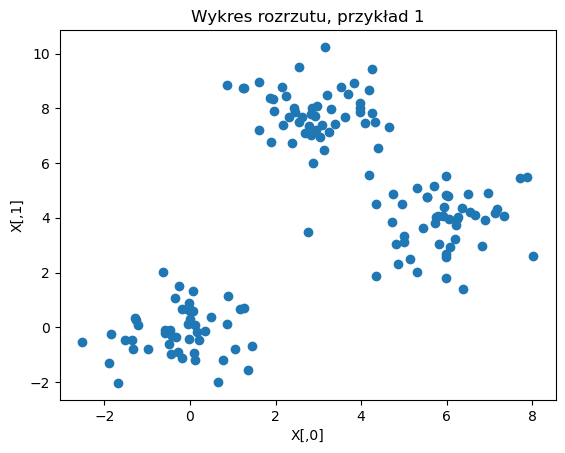

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.title("Wykres rozrzutu, przykład 1")
plt.xlabel("X[,0]")
plt.ylabel("X[,1]")
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [7]:
model1 = KMeans(n_clusters = 3, n_init = 10, random_state = 7) # instancja klasy KMeans, metody fit, predict i score (scikit_learn modele ML to klasy)

n_init to liczba inicjalizacji algorytmu, zwracany jest model o najniższym WSS

In [15]:
model1.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=7)

In [16]:
labels1 = model1.labels_ # przynależności do 3 klastrów
print(labels1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print(model1.predict(X)) # zwraca przynależności do klas

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Każdy element ma przypisaną przynależność do grupy ("klasę"), ale w odróżnieniu od klasyfikacji, nie ma tutaj podstawowej prawdy, do której można się porównać! W szczególności, etykiety nie mają znaczenia, ponowne uruchomienie algorytmu może przypisać pierwszej grupie 1, a drugiej 0.

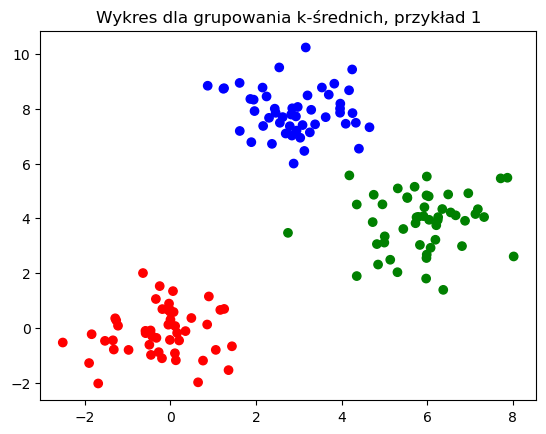

In [17]:
plt.scatter(X[:,0], X[:,1], c = np.array(["red", "blue", "green"])[np.array(labels1)])
#plt.scatter(X[:,0], X[:,1], c = labels1)

plt.title("Wykres dla grupowania k-średnich, przykład 1")
#plt.xlabel("X[,0]")
#plt.ylabel("X[,1]")
plt.show()

In [11]:
print(model1.cluster_centers_) # środki klastrów

[[-0.22430886 -0.12155112]
 [ 2.924847    7.89316515]
 [ 5.88338314  3.85328103]]


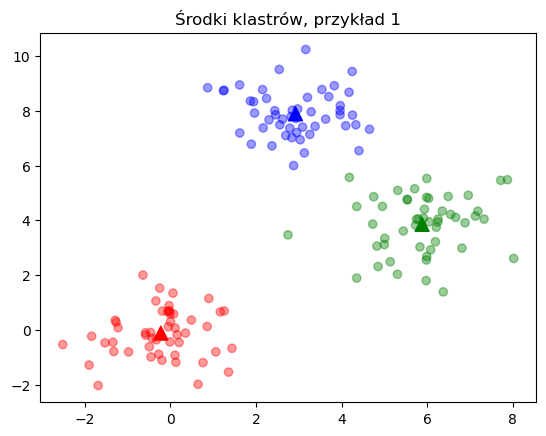

In [18]:
plt.scatter(X[:,0], X[:,1], c = np.array(["red","blue","green"])[np.array(labels1)], alpha = 0.4)
centers1 = model1.cluster_centers_
plt.scatter(centers1[:,0], centers1[:,1], marker="^", c = ["red","blue","green"], s = 100)
plt.title("Środki klastrów, przykład 1")
plt.show()

In [19]:
model1 = KMeans(n_clusters=3, n_init = 10, random_state = 7, verbose=1)
model1.fit(X)

Initialization complete
Iteration 0, inertia 465.3906265701569.
Iteration 1, inertia 254.5382488728014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 377.1317289396643.
Iteration 1, inertia 254.7940226056861.
Iteration 2, inertia 254.5382488728014.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 406.10510587272273.
Iteration 1, inertia 254.7940226056861.
Iteration 2, inertia 254.5382488728014.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 442.30256498489126.
Iteration 1, inertia 254.5382488728014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 389.2167406969532.
Iteration 1, inertia 255.9475769916928.
Iteration 2, inertia 254.5382488728014.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 501.6518399674453.
Iteration 1, inertia 254.5382488728014.
Converged at iteration 1

KMeans(n_clusters=3, n_init=10, random_state=7, verbose=1)

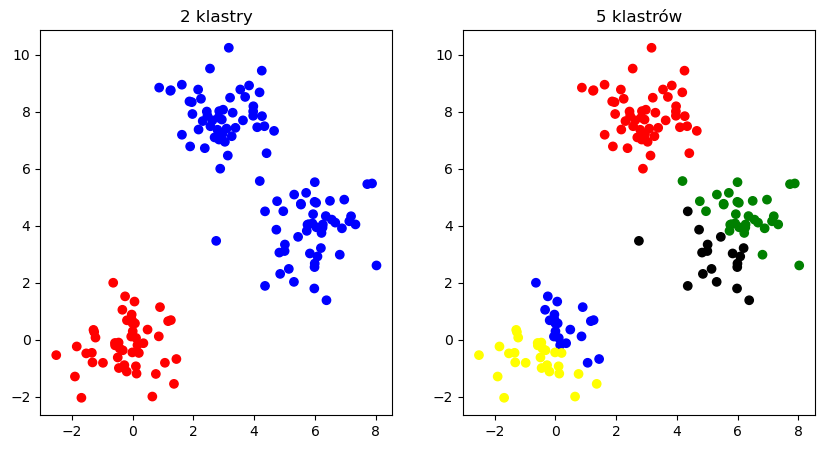

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
model2 = KMeans(n_clusters = 2, n_init = 10, random_state = 7)
model2.fit(X)
labels2 = model2.labels_

model3 = KMeans(n_clusters = 5, n_init = 10, random_state = 7)
model3.fit(X)
labels3 = model3.labels_

axes[0].scatter(X[:,0], X[:,1], c = np.array(["red", "blue"])[np.array(labels2)])
axes[0].set_title('2 klastry')
axes[1].scatter(X[:,0], X[:,1], c = np.array(["red", "blue", "green", "black", "yellow"])[np.array(labels3)])
axes[1].set_title('5 klastrów')
plt.show()

### Ćwiczenie 1

 Wygeneruj poniższe dane i wykonaj grupowanie k-średnich dla 4 grup. Zwizualizuj wyniki.

In [269]:
rng = np.random.default_rng(seed = 7)
X = np.vstack([rng.multivariate_normal([0, 0], [[1,0], [0,1]], 30),
                         rng.multivariate_normal([-5,-5], [[1,0], [0,1]], 30),
                         rng.multivariate_normal([5,5], [[1,0], [0,1]], 30),
                         rng.multivariate_normal([4,-2], [[1,0], [0,1]], 30)])

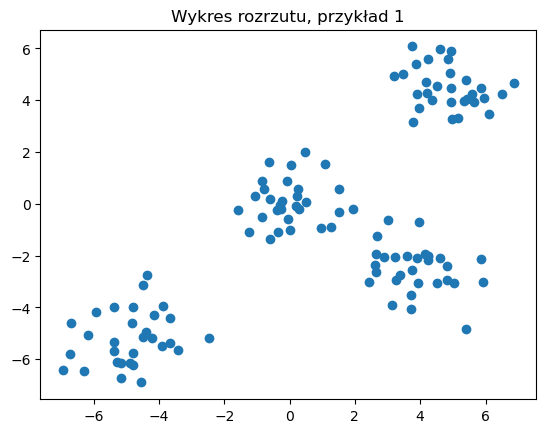

In [144]:
plt.scatter(X[:,0], X[:,1])
plt.title("Wykres rozrzutu, przykład 1")
plt.show()

In [145]:
model = KMeans(n_clusters = 4, n_init = 10, random_state = 7)
model.fit(X)
labels = model.labels_ # przynależności do 3 klastrów
print(labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


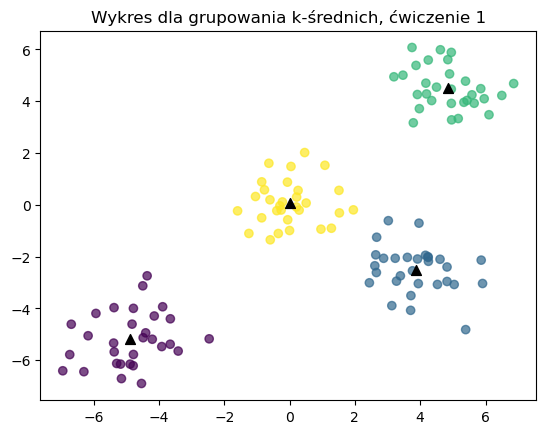

In [146]:
plt.scatter(X[:,0], X[:,1], c = labels, alpha =.7)
plt.title("Wykres dla grupowania k-średnich, ćwiczenie 1")
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="^", c = range(4), s = 100)
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker="^", c = "black", s = 50)

plt.show()

### Przykład 2: skalowanie

In [22]:
rng = np.random.default_rng(seed = 7)
X = np.vstack([rng.multivariate_normal([0, 0], [[1,0], [0,300]], 30),
                         rng.multivariate_normal([-8,-8], [[1,0], [0,200]], 30)])

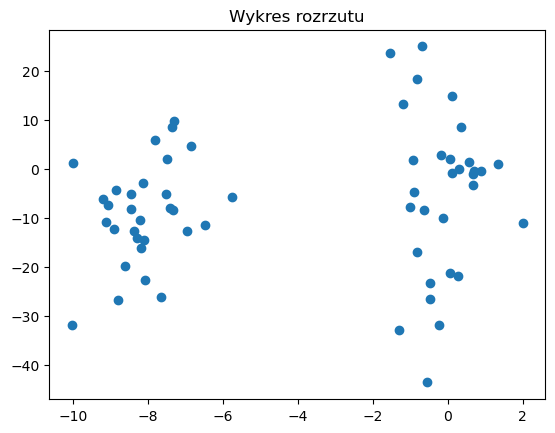

In [23]:
plt.scatter(X[:,0], X[:,1])
plt.title("Wykres rozrzutu")
plt.show()

In [24]:
model1 = KMeans(n_clusters = 2, n_init = 10, random_state = 7)
model1.fit(X)
labels1 = model1.labels_ 
print(labels1)

[1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1]


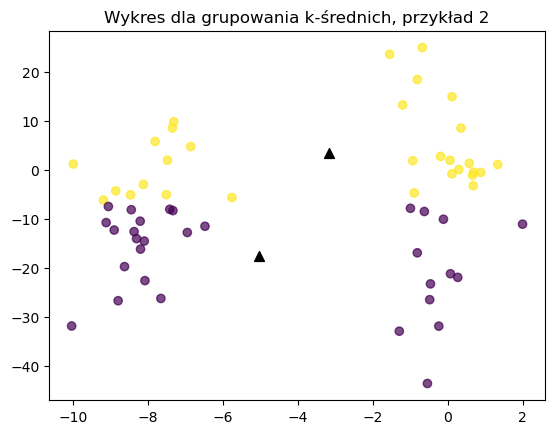

In [25]:
plt.scatter(X[:,0], X[:,1], c = labels1, alpha =.7)
plt.title("Wykres dla grupowania k-średnich, przykład 2")
centers1 = model1.cluster_centers_
plt.scatter(centers1[:,0], centers1[:,1], marker="^", c = "black", s = 50)
plt.show()

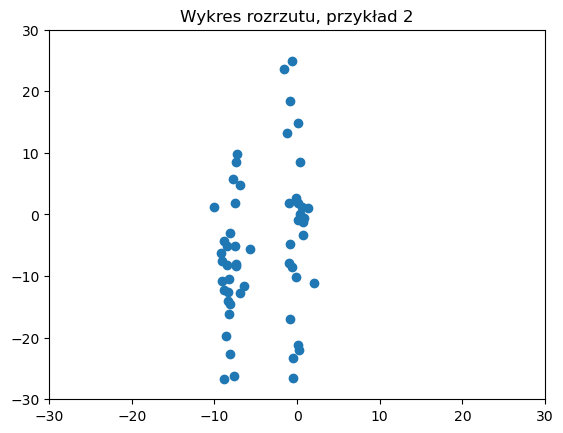

In [26]:
plt.scatter(X[:,0], X[:,1])
plt.title("Wykres rozrzutu, przykład 2")
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

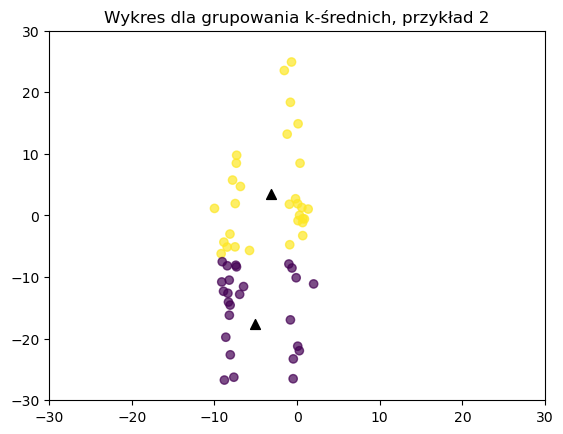

In [27]:
plt.scatter(X[:,0], X[:,1], c = labels1, alpha =.7)
plt.title("Wykres dla grupowania k-średnich, przykład 2")
centers1 = model1.cluster_centers_
plt.scatter(centers1[:,0], centers1[:,1], marker="^", c = "black", s = 50)
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.show()

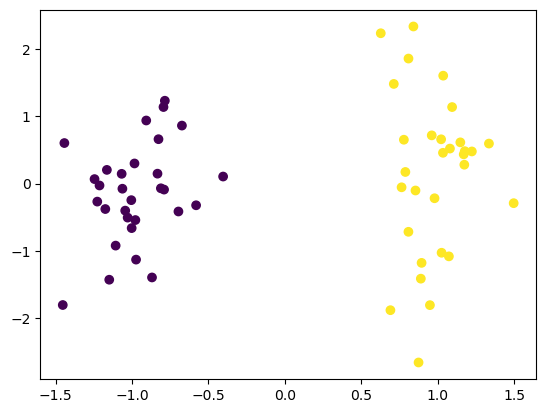

In [28]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) # skalowanie danych! Standaryzacja do średniej 0 i wariancji 1
# fit_transform razem!!
model2 = KMeans(n_clusters = 2, n_init = 10, random_state = 7)
model2.fit(X_scaled)
labels2 = model2.labels_ 
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = labels2)
plt.show()

### Uwaga na skalowanie danych!!

Algorytm k-średnich często wymaga wstępnej transformacji danych.

Z uwagi na wykorzystanie w grupowaniu k-średnich odległości euklidesowej, często potrzebne jest skalowanie danych (żeby wszystkie cechy mierzone były na jednej skali). Trzeba tylko uważać, czy któraś ze zmiennych nie jest według nas ważniejsza dla grupowania (możemy też celowo zwiększyć wpływ danej zmiennej na grupowanie dając jej większą wagę!). Inne metody transformacji danych to np. klasy RobustScaler, Normalizer czy MinMaxScaler.

### Ćwiczenie 2: awarie k-średnich

Dla danych X1 i X2 wykonaj skalowanie i grupowanie k-średnich dla odpowiedniej liczby grup. Zwizualizuj wyniki. Dlaczego algorytm k-średnich nie poradził sobie z grupowaniem?

In [30]:
#np.random.seed(0)
n_samples = 500
random_state = 170
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
varied_normal = make_blobs(
    n_samples = n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
X1 = noisy_moons[0]
X2 = varied_normal[0]

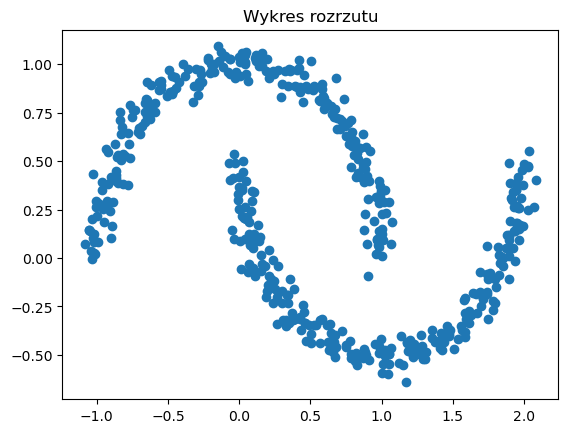

In [31]:
plt.scatter(X1[:,0], X1[:,1])
plt.title("Wykres rozrzutu")
plt.show()

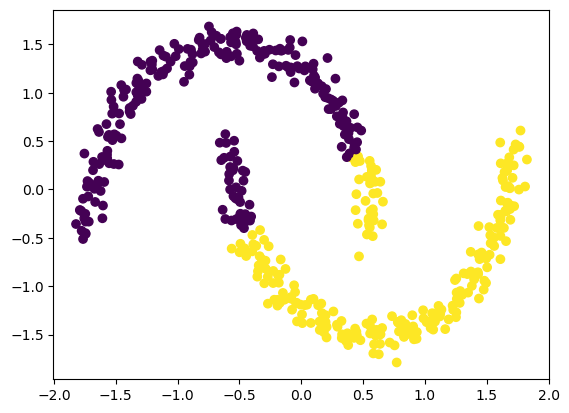

In [33]:
scaler1 = StandardScaler() 
X1_scaled = scaler1.fit_transform(X1)
model1 = KMeans(n_clusters = 2, n_init = 10, random_state = 7)
model1.fit(X1_scaled)
labels1 = model1.labels_ 
plt.scatter(X1_scaled[:,0], X1_scaled[:,1], c = labels1)
plt.show()

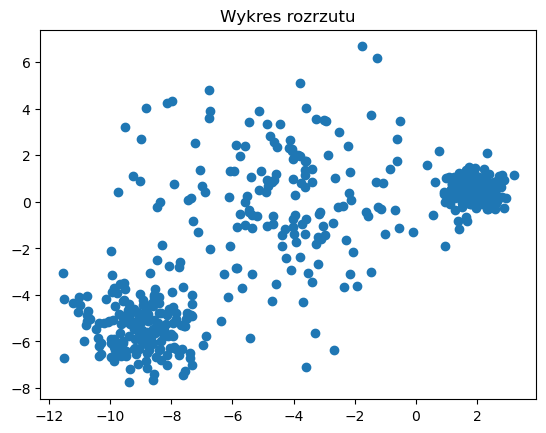

In [34]:
plt.scatter(X2[:,0], X2[:,1])
plt.title("Wykres rozrzutu")
plt.show()


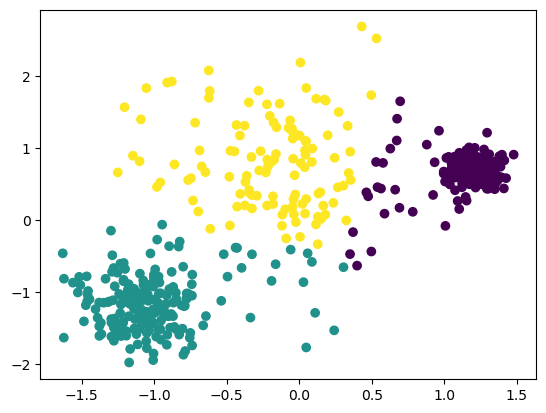

In [35]:
scaler2 = StandardScaler() 
X2_scaled = scaler2.fit_transform(X2)
model2 = KMeans(n_clusters = 3, n_init = 10, random_state = 7)
model2.fit(X2_scaled)
labels2 = model2.labels_ 
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c = labels2)
plt.show()

Obejrzyj inne przykładowe zbiory danych i sprawdź jak radzi sobie z nimi algorytm k-średnich (MiniBatch Kmeans). 

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### Wybór k w k-średnich

### Przykład 3: Irysy

Dla danych Irysy znajdź liczbę klastrów i wykonaj grupowanie k-średnich. Zwizualizuj wyniki.

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://www.math.umd.edu/~petersd/666/html/iris_pca.html

In [36]:
iris = load_iris()

In [39]:
type(iris)

sklearn.utils._bunch.Bunch

In [55]:
# iris
#y = iris.target

In [37]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [38]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [130]:
#np.bincount(y)

In [131]:
#iris.target_names[np.unique(y)]

In [132]:
#values, counts = np.unique(iris.target_names[y], return_counts = True)

In [133]:
#values

In [134]:
#counts

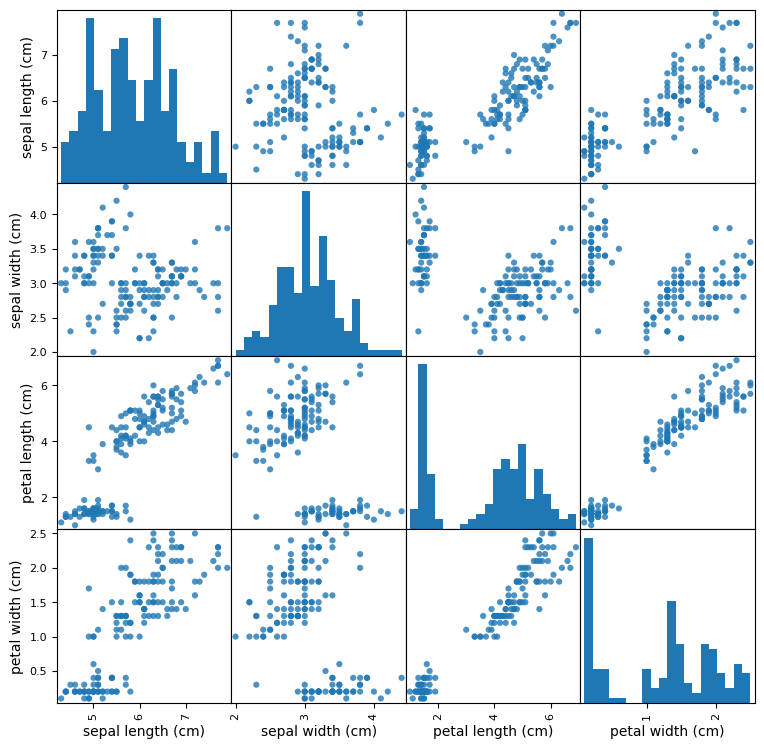

In [40]:
pd.plotting.scatter_matrix(iris_df, figsize = (9, 9), marker = "o", hist_kwds = {"bins": 20}, s= 20, alpha = 0.8)
plt.show()

In [137]:
#plt.figure()
#plt.imshow([np.unique(iris.target)])
#_ = plt.xticks(ticks = np.unique(iris.target),labels = iris.target_names)

In [112]:
#iris_df[iris_df.columns[0]]

In [41]:
# skalowanie danych
X_scaled = StandardScaler().fit_transform(iris.data) 

Przypomnienie PCA

https://en.wikipedia.org/wiki/Principal_component_analysis

Pierwszy komponent główny to kierunek maksymalnej wariancji, następny to kierunek maksymalizujący wariancję prostopadły do pierwszego, itd.

In [42]:
# 2 pierwsze komponenty główne dla wizualizacji
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

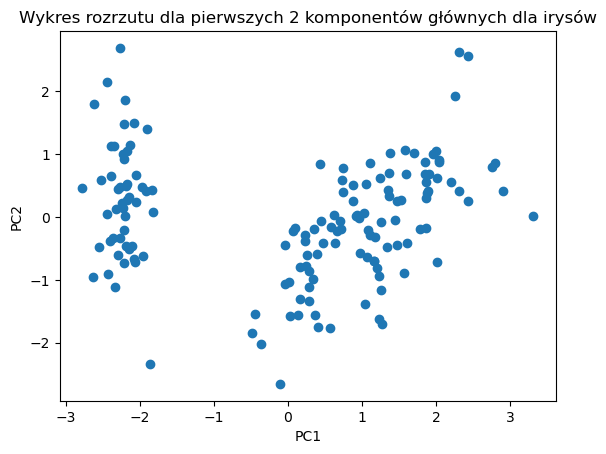

In [43]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("Wykres rozrzutu dla pierwszych 2 komponentów głównych dla irysów")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### Reguła łokcia dla wykresu WSS od k i indeks sylwetki

In [44]:
wss = []
sil_score = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, n_init = 10, random_state = 7)
    model.fit(X_scaled)
    wss.append(model.inertia_)
    if i>1:
        sil_score.append(silhouette_score(X_scaled, model.labels_))

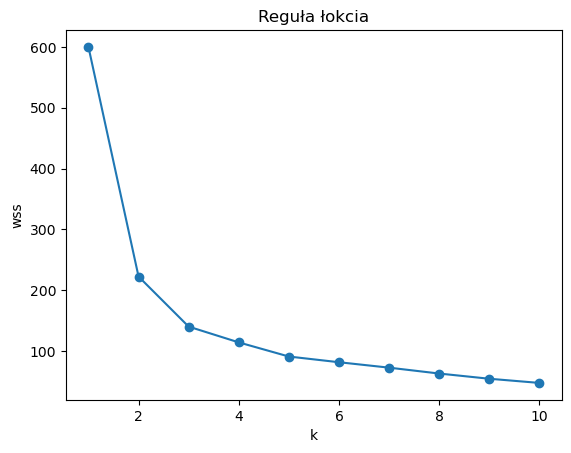

In [45]:
plt.plot(range(1, 11), wss, "-o")
plt.title("Reguła łokcia")
plt.xlabel("k")
plt.ylabel("wss")
#plt.savefig('lokiec.png')
plt.show()

In [46]:
kl = KneeLocator(range(1, 11), wss, curve="convex", direction="decreasing")
kl.elbow

3

In [47]:
model = KMeans(n_clusters = 3, n_init = 10, random_state = 7)
model.fit(X_scaled)
labels = model.labels_ 

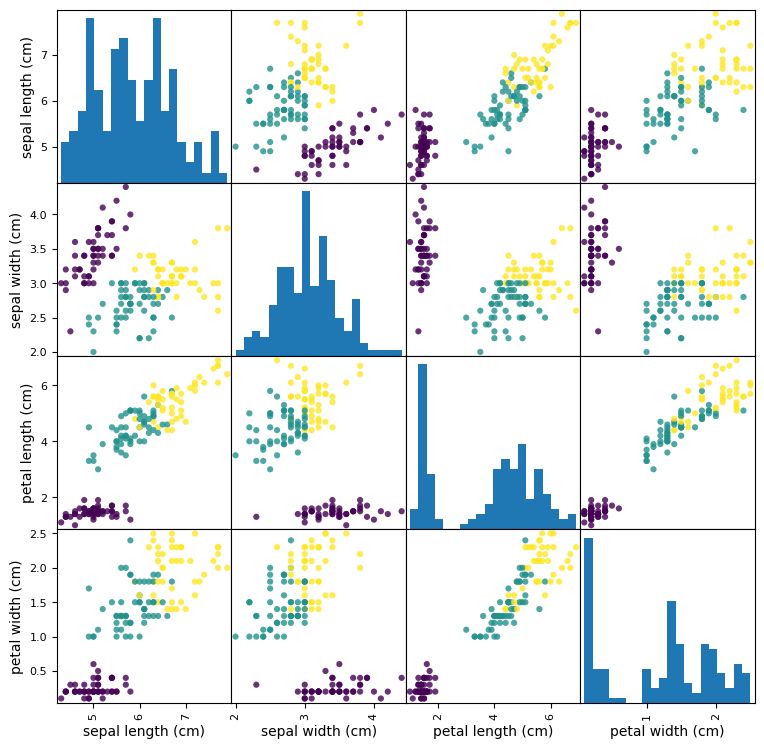

In [48]:
# model zbudowany dla przeskalowanych danych, ale przynależność do klas "działa" też na wyjściowych
pd.plotting.scatter_matrix(iris_df, c = model.labels_, figsize = (9, 9), marker = "o", hist_kwds = {"bins": 20}, s= 20, alpha = 0.8)
plt.show()

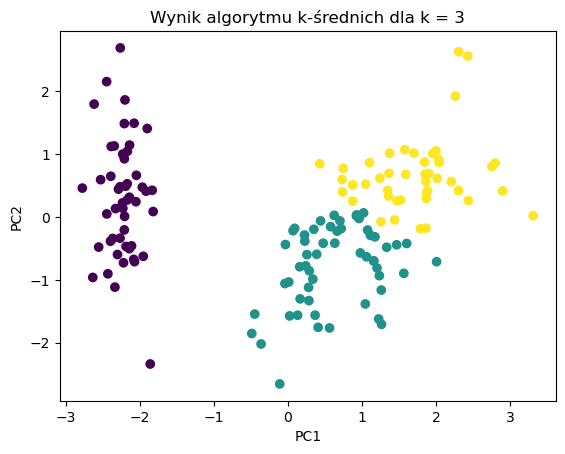

In [49]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wynik algorytmu k-średnich dla k = 3")
plt.show()

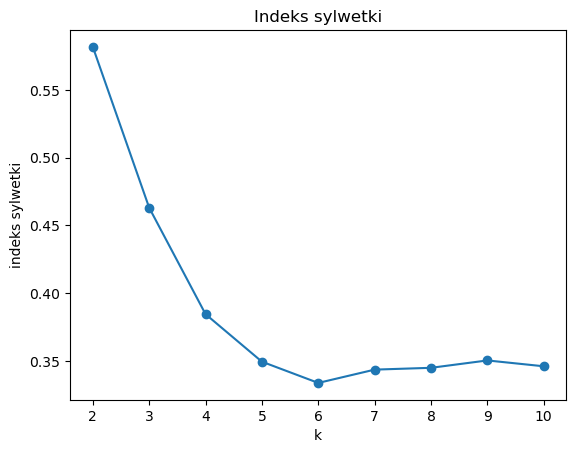

In [50]:
plt.plot(range(2, 11), sil_score, "-o")
plt.title("Indeks sylwetki")
plt.xlabel("k")
plt.ylabel("indeks sylwetki")
#plt.savefig('sylwetka.png')
plt.show()

In [51]:
model = KMeans(n_clusters = 2, n_init = 10, random_state = 7)
model.fit(X_scaled)
labels = model.labels_ 

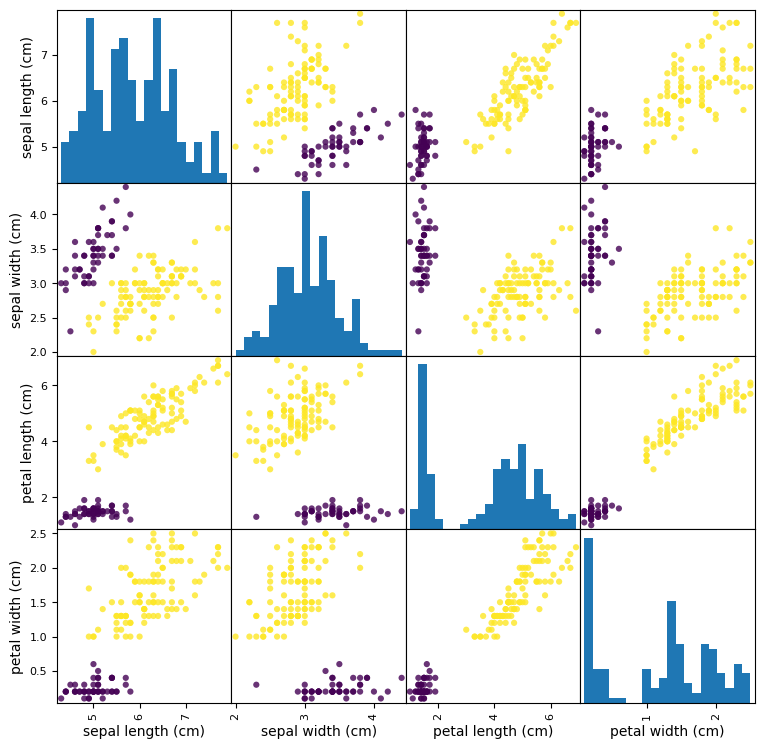

In [52]:
pd.plotting.scatter_matrix(iris_df, c = model.labels_, figsize = (9, 9), marker = "o", hist_kwds = {"bins": 20}, s= 20, alpha = 0.8)
plt.show()

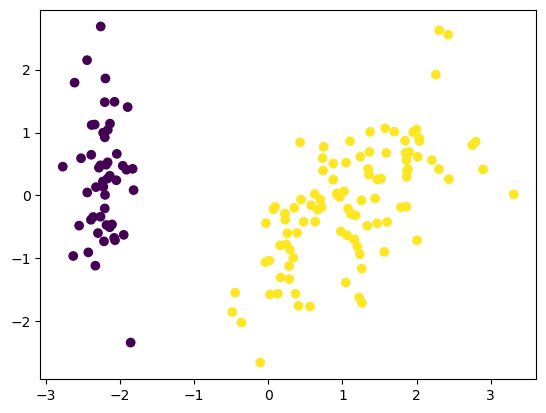

In [53]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = labels)
plt.show()

### Ćwiczenie 3: jednorodne grupy z rozkładu normalnego

In [8]:
rng = np.random.default_rng(seed = 7)
X = np.vstack([rng.multivariate_normal([0, 0], [[1,0], [0,1]], 50),
                         rng.multivariate_normal([3,8], [[1,0], [0,1]], 50),
                         rng.multivariate_normal([6,4], [[1,0], [0,1]], 50)])

In [9]:
wss = []
sil_score = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, n_init = 10, random_state = 7)
    model.fit(X)
    wss.append(model.inertia_)
    if i>1:
        sil_score.append(silhouette_score(X, model.labels_))

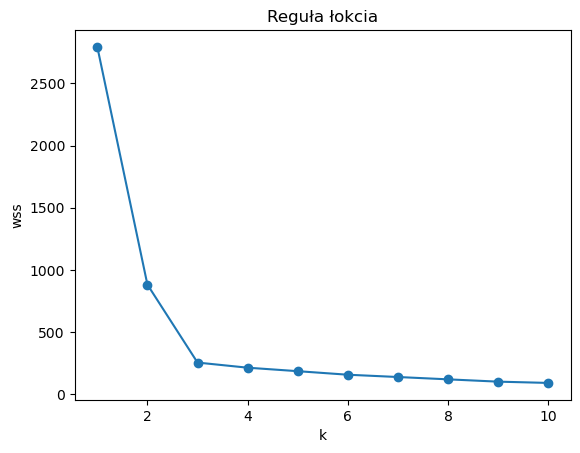

In [10]:
plt.plot(range(1, 11), wss, "-o")
plt.title("Reguła łokcia")
plt.xlabel("k")
plt.ylabel("wss")
#plt.savefig('lokiec.png')
plt.show()

In [11]:
kl = KneeLocator(range(1, 11), wss, curve="convex", direction="decreasing")
kl.elbow

3

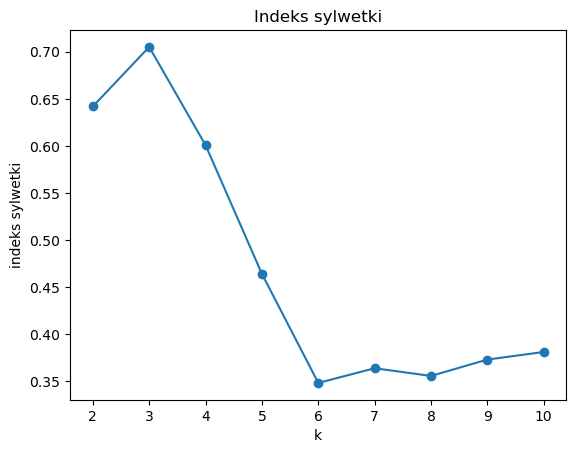

In [165]:
plt.plot(range(2, 11), sil_score, "-o")
plt.title("Indeks sylwetki")
plt.xlabel("k")
plt.ylabel("indeks sylwetki")
#plt.savefig('sylwetka.png')
plt.show()

### Przykład 4: grupowanie k-średnich jako dekompozycja

Interesujące podobieństwo k-średnich i np. PCA. PCA ma przedstawić punkty jako sumę składników maksymalizującą wariancję. 
Algorytm k-średnich próbuje przedstawić punkty jako centrum klastra.  

In [54]:
X, y = make_moons(n_samples = 300, noise = 0.15, random_state = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 7)

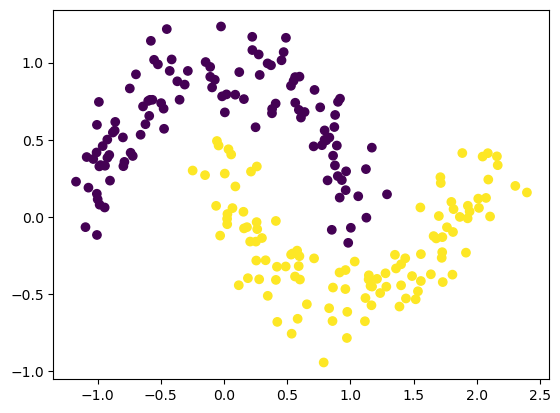

In [57]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

Dla danych two moons PCA niewiele może pomóc, dane są w dwóch wymiarach. Algorytm k-średnich pozwala na zwiększenie liczby
"wymiarów" i przedstawienie danych w sposób ułatwiający ich analizę i lepszą klasyfikację za pomocą prostego klasyfikatora 
liniowego.

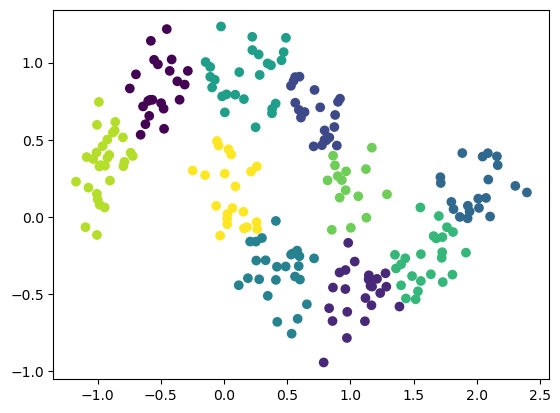

In [58]:
model = KMeans(n_clusters = 10, random_state = 7, n_init = 10)
model.fit(X_train)
labels = model.labels_ 
plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

Możemy stworzyć reprezentację danych, gdzie każdemu punktowi odpowiada cyfra od 0 do 9 w zależności od
przynależności do klastra. Reprezentacja miałaby 10 komponentów. Dla takich danych można zbudować klasyfikator 
liniowy, który lepiej oddziela klasy. Możemy też skorzystać z reprezentacji dancyh 
w funckji transform obiektu model (zwracającej odległości do każdego z centrów klastrów).

In [59]:
X2_train = model.transform(X_train)

In [60]:
X2_test = model.transform(X_test)

In [61]:
X2_train

array([[1.13989559, 0.98577342, 0.916489  , ..., 0.85102581, 1.19708696,
        0.25162155],
       [1.51984603, 0.56353403, 0.89980363, ..., 0.584864  , 1.622095  ,
        0.63909621],
       [1.80504342, 0.34048251, 0.874461  , ..., 0.36423099, 1.99312701,
        0.97860953],
       ...,
       [1.48383108, 0.85275949, 0.36677703, ..., 0.17806297, 1.82223511,
        0.83912529],
       [0.97198667, 1.14467499, 0.90134773, ..., 0.93471767, 1.04997443,
        0.09627746],
       [2.4042318 , 0.7086431 , 1.24778371, ..., 0.76585938, 2.66728157,
        1.64719046]])

In [62]:
X2_train.shape

(225, 10)

In [63]:
X2_test.shape

(75, 10)

### Ćwiczenie 4: dekompozycja k-średnich poprawia działanie regresji logistycznej 
Zbuduj modele regresji logistycznej na danych oryginalnych oraz na nowym zbiorze. Porównaj
dokładność modeli za pomocą fcji score na danych treningowych i testowych. 

In [64]:
logreg = LogisticRegression().fit(X2_train, y_train)

In [65]:
logreg.score(X2_train, y_train)

0.9466666666666667

In [66]:
logreg.score(X2_test, y_test)

0.8666666666666667

In [67]:
logreg2 = LogisticRegression().fit(X_train, y_train)

In [68]:
logreg2.score(X_train, y_train)

0.8933333333333333

In [69]:
logreg2.score(X_test, y_test)

0.8133333333333334

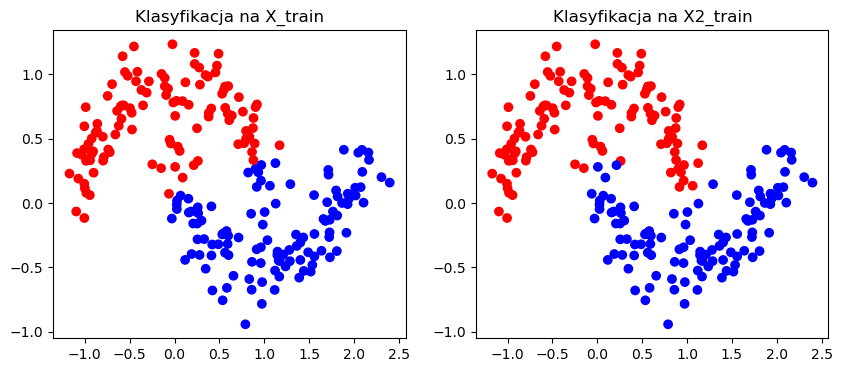

In [76]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
axes[0].scatter(X_train[:,0], X_train[:,1], c = np.array(["red", "blue"])[np.array(logreg2.predict(X_train))])
axes[0].set_title('Klasyfikacja na X_train')
axes[1].scatter(X_train[:,0], X_train[:,1], c = np.array(["red", "blue", ])[np.array(logreg.predict(X2_train))])
axes[1].set_title('Klasyfikacja na X2_train')
plt.show()

## Grupowanie aglomeracyjne

### Przykład 1: ilustracja działania algorytmu 

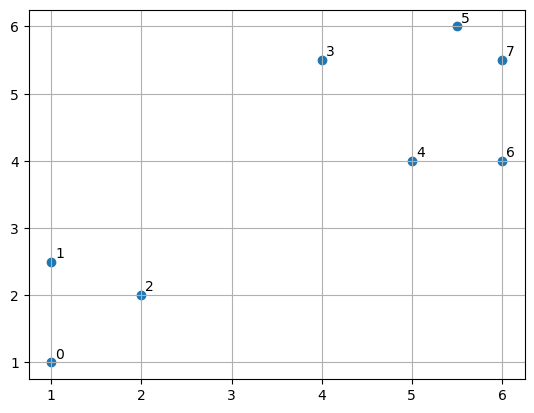

In [111]:
X = np.array([[1,1], [1,2.5], [2,2], [4,5.5], [5,4], [5.5,6], [6,4], [6,5.5]])
plt.grid()    
plt.scatter(X[:,0], X[:,1])
for i in range(X.shape[0]):
    plt.annotate(str(i), xy=(X[i,0], X[i,1]), xytext=(3, 3), textcoords='offset points')
#plt.savefig('hclust2.png')
plt.show()

In [96]:
L1 = linkage(X, method='complete', metric='euclidean')

In [97]:
L1

array([[ 5.        ,  7.        ,  0.70710678,  2.        ],
       [ 4.        ,  6.        ,  1.        ,  2.        ],
       [ 1.        ,  2.        ,  1.11803399,  2.        ],
       [ 0.        , 10.        ,  1.5       ,  3.        ],
       [ 3.        ,  8.        ,  2.        ,  3.        ],
       [ 9.        , 12.        ,  2.5       ,  5.        ],
       [11.        , 13.        ,  6.72681202,  8.        ]])

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

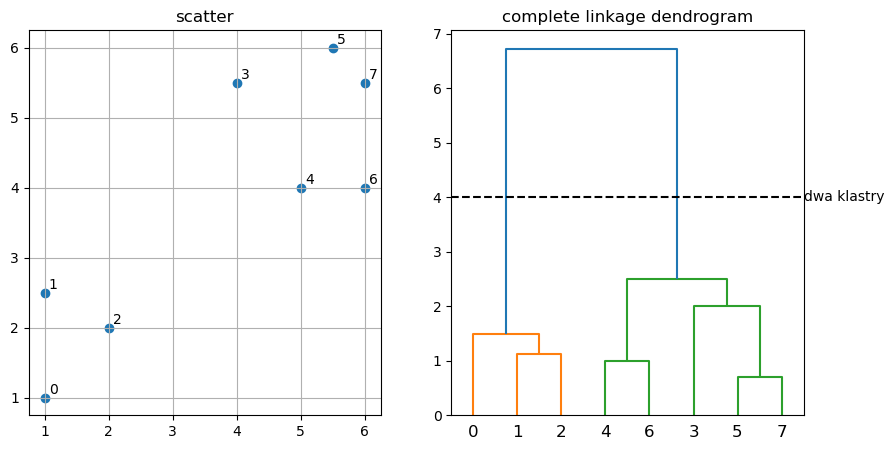

In [100]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
for i in range(X.shape[0]):
    plt.annotate(str(i), xy=(X[i,0], X[i,1]), xytext=(3, 3), textcoords='offset points')
plt.grid()    
plt.scatter(X[:,0], X[:,1])
plt.title('scatter')
plt.subplot(122)
dendrogram(L1)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [4,4], '--', c = 'black')
ax.text(bounds[1], 4, 'dwa klastry', va = 'center', fontdict = {'size':10})
plt.title('complete linkage dendrogram')
#plt.savefig('hclust.png')
plt.show()
# 0.7*max(Z[:,2]) cięcie zaznaczone

In [101]:
clust1 = fcluster(L1, 2, criterion='maxclust')

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [102]:
clust1

array([1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [106]:
clust_h = fcluster(L1, 4, criterion = 'distance')

In [107]:
clust_h

array([1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

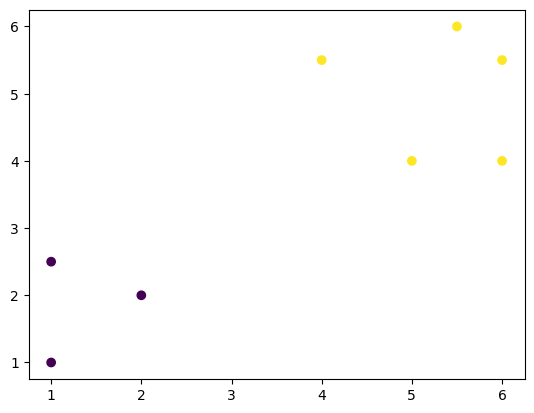

In [108]:
plt.scatter(X[:,0], X[:,1], c= clust1)
plt.show()

In [109]:

#?linkage
L2 = linkage(X, method='single', metric='euclidean')
#Z2 = linkage(X, method='complete', metric='euclidean')
L3 = linkage(X, method='average', metric='euclidean')
L4 = linkage(X, method='ward', metric='euclidean')


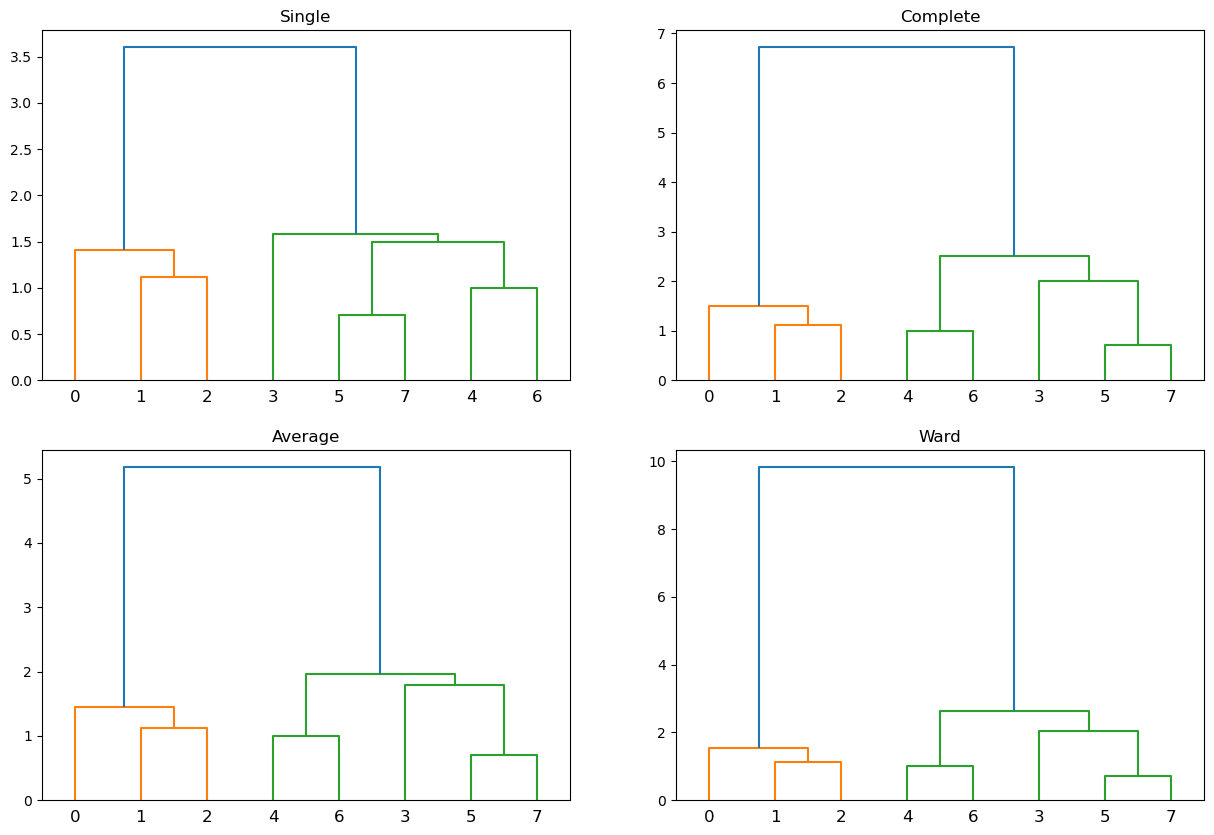

In [110]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(L2), plt.title('Single')
plt.subplot(2,2,2), dendrogram(L1), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(L3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(L4), plt.title('Ward')
plt.show()


In [112]:
clust2 = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
clust2.fit_predict(X)
print(clust2.labels_)


[1 1 1 0 0 0 0 0]


### Ćwiczenie1: ilustrujące metody przeliczania odległości

Dla wygenerowanych danych wykonaj klasteryzację hierarchiczną dla metod Single, Complete, Average i Ward. 
Narysuj wyniki grupowań i porównaj wyniki. Pamiętaj o skalowaniu danych!

In [147]:
X1 = make_blobs(n_samples=[50, 20], n_features=2, centers=[[2,2], [7,2]], cluster_std=[.75,.4], random_state = 7)[0]

In [148]:
scaler1 = StandardScaler()
X1scaled = scaler1.fit_transform(X1)

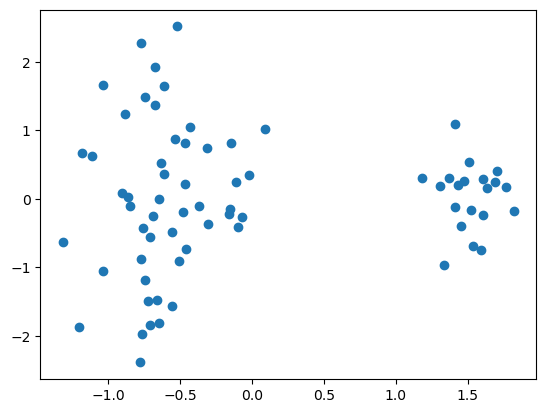

In [149]:
plt.scatter(X1scaled[:,0], X1scaled[:,1])
plt.show()

In [150]:
L2 = linkage(X1scaled, method='single', metric='euclidean')
L1 = linkage(X1scaled, method='complete', metric='euclidean')
L3 = linkage(X1scaled, method='average', metric='euclidean')
L4 = linkage(X1scaled, method='ward', metric='euclidean')

In [138]:
clust1 = fcluster(L1, 2, criterion='maxclust')
clust2 = fcluster(L2, 2, criterion='maxclust')
clust3 = fcluster(L3, 2, criterion='maxclust')
clust4 = fcluster(L4, 2, criterion='maxclust')

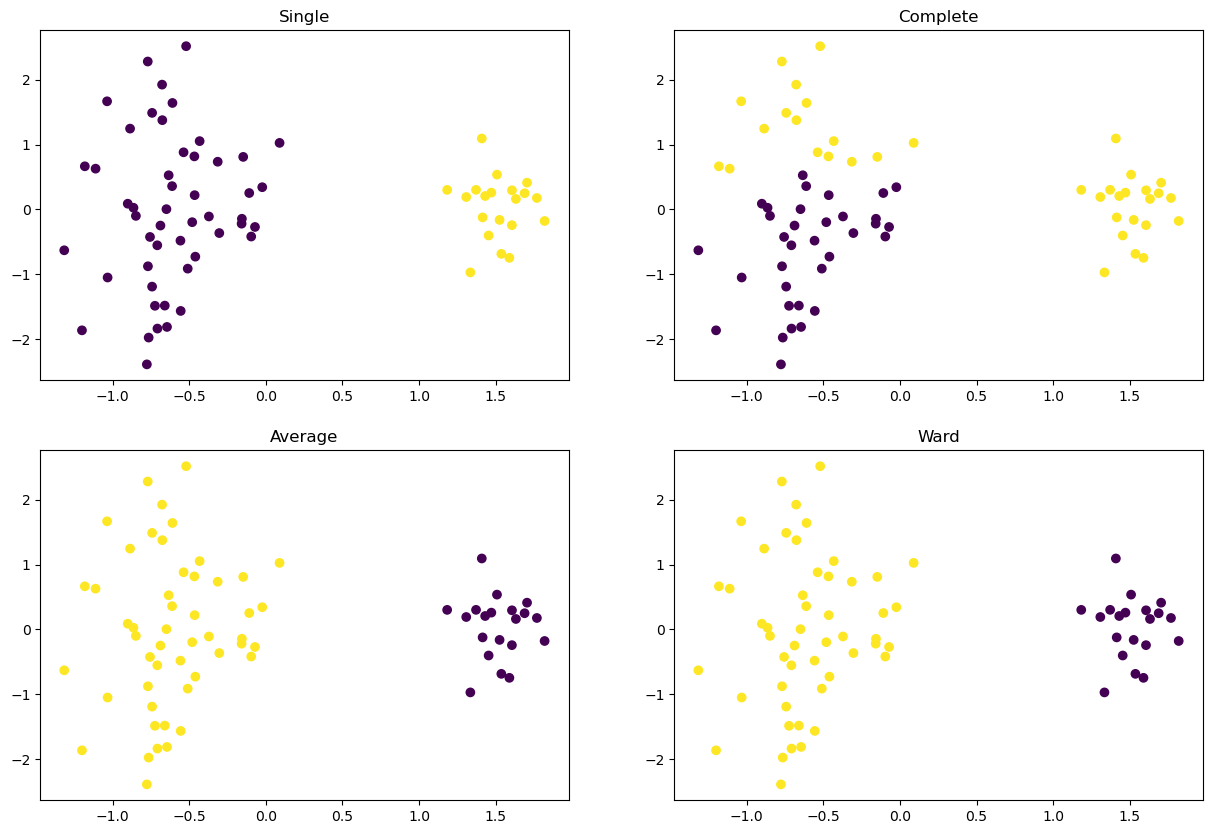

In [139]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X1scaled[:,0], X1scaled[:,1], c= clust2)
plt.title('Single')
plt.subplot(222) 
plt.scatter(X1scaled[:,0], X1scaled[:,1], c= clust1)
plt.title('Complete')
plt.subplot(223)
plt.scatter(X1scaled[:,0], X1scaled[:,1], c= clust3)
plt.title('Average')
plt.subplot(224)
plt.scatter(X1scaled[:,0], X1scaled[:,1], c= clust4)
plt.title('Ward')
plt.show()

In [140]:
X2 = np.vstack([make_blobs(n_samples=[50, 20], n_features=2, centers=[[2,2], [7,2]], cluster_std=[.75,.4], random_state = 7)[0],
              np.vstack([np.linspace(2,7,10), np.ones(10)*2]).T])
               

In [141]:
scaler2 = StandardScaler()
X2scaled = scaler2.fit_transform(X2)

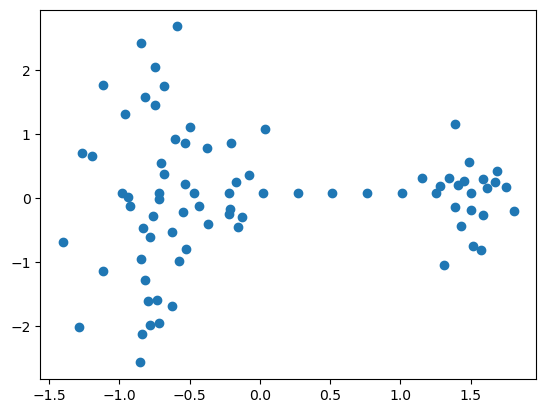

In [142]:
plt.scatter(X2scaled[:,0], X2scaled[:,1])
plt.show()

In [143]:
L2 = linkage(X2scaled, method='single', metric='euclidean')
L1 = linkage(X2scaled, method='complete', metric='euclidean')
L3 = linkage(X2scaled, method='average', metric='euclidean')
L4 = linkage(X2scaled, method='ward', metric='euclidean')

In [144]:
clust1 = fcluster(L1, 2, criterion='maxclust')
clust2 = fcluster(L2, 2, criterion='maxclust')
clust3 = fcluster(L3, 2, criterion='maxclust')
clust4 = fcluster(L4, 2, criterion='maxclust')

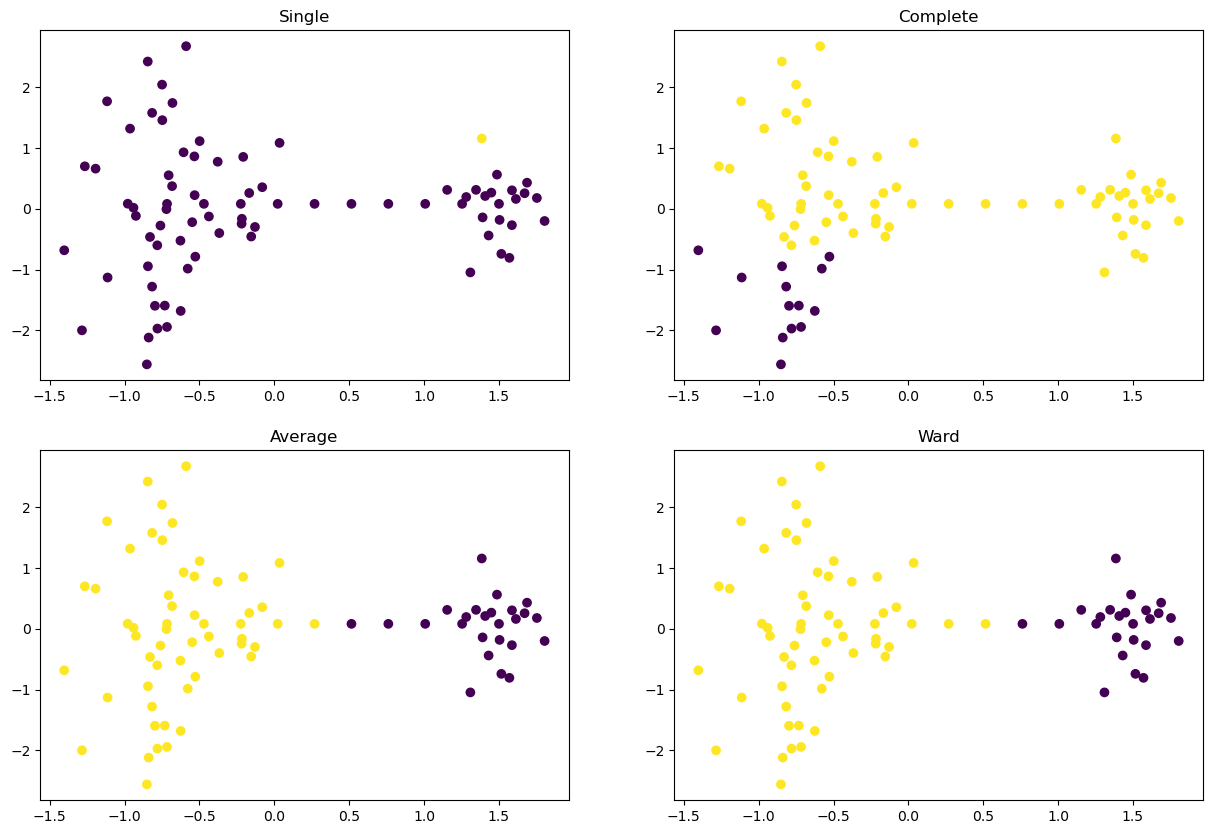

In [145]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X2scaled[:,0], X2scaled[:,1], c= clust2)
plt.title('Single')
plt.subplot(222) 
plt.scatter(X2scaled[:,0], X2scaled[:,1], c= clust1)
plt.title('Complete')
plt.subplot(223)
plt.scatter(X2scaled[:,0], X2scaled[:,1], c= clust3)
plt.title('Average')
plt.subplot(224)
plt.scatter(X2scaled[:,0], X2scaled[:,1], c= clust4)
plt.title('Ward')
plt.show()

In [152]:
np.random.seed(0)
n_samples = 500
random_state = 170
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
varied_normal = make_blobs(
    n_samples = n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
X3 = noisy_moons[0]
X4 = varied_normal[0]

In [154]:
scaler3 = StandardScaler()
X3scaled = scaler3.fit_transform(X3)

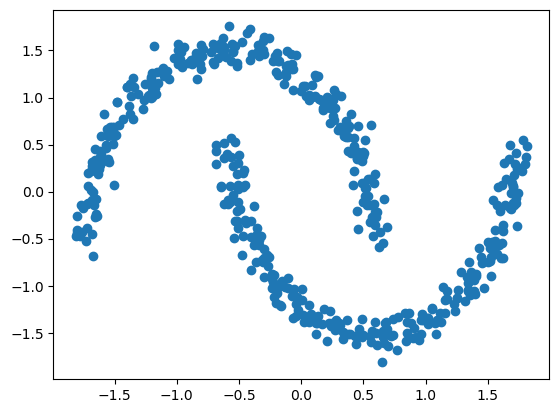

In [155]:
plt.scatter(X3scaled[:,0], X3scaled[:,1])
plt.show()

In [156]:
L2 = linkage(X3scaled, method='single', metric='euclidean')
L1 = linkage(X3scaled, method='complete', metric='euclidean')
L3 = linkage(X3scaled, method='average', metric='euclidean')
L4 = linkage(X3scaled, method='ward', metric='euclidean')

In [157]:
clust1 = fcluster(L1, 2, criterion='maxclust')
clust2 = fcluster(L2, 2, criterion='maxclust')
clust3 = fcluster(L3, 2, criterion='maxclust')
clust4 = fcluster(L4, 2, criterion='maxclust')

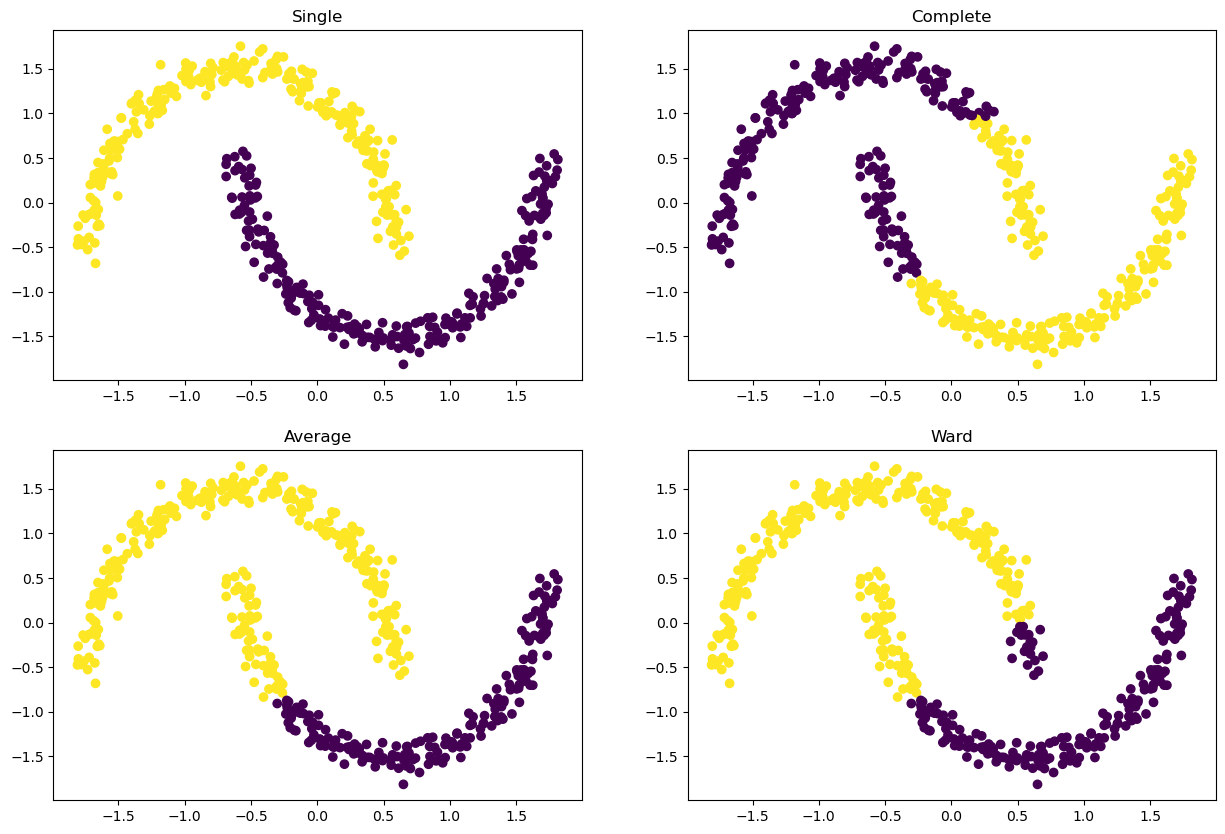

In [158]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X3scaled[:,0], X3scaled[:,1], c= clust2)
plt.title('Single')
plt.subplot(222) 
plt.scatter(X3scaled[:,0], X3scaled[:,1], c= clust1)
plt.title('Complete')
plt.subplot(223)
plt.scatter(X3scaled[:,0], X3scaled[:,1], c= clust3)
plt.title('Average')
plt.subplot(224)
plt.scatter(X3scaled[:,0], X3scaled[:,1], c= clust4)
plt.title('Ward')
plt.show()

In [159]:
scaler4 = StandardScaler()
X4scaled = scaler4.fit_transform(X4)

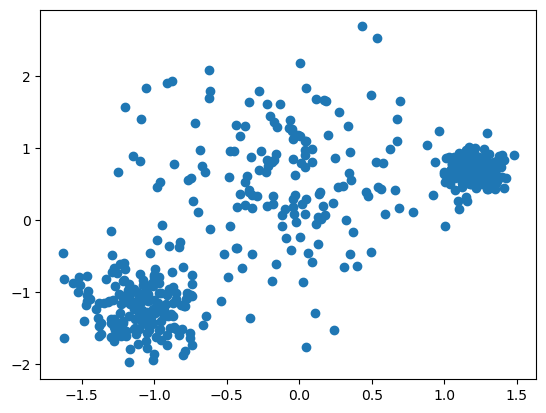

In [160]:
plt.scatter(X4scaled[:,0], X4scaled[:,1])
plt.show()

In [161]:
L2 = linkage(X4scaled, method='single', metric='euclidean')
L1 = linkage(X4scaled, method='complete', metric='euclidean')
L3 = linkage(X4scaled, method='average', metric='euclidean')
L4 = linkage(X4scaled, method='ward', metric='euclidean')

In [162]:
clust1 = fcluster(L1, 3, criterion='maxclust')
clust2 = fcluster(L2, 3, criterion='maxclust')
clust3 = fcluster(L3, 3, criterion='maxclust')
clust4 = fcluster(L4, 3, criterion='maxclust')

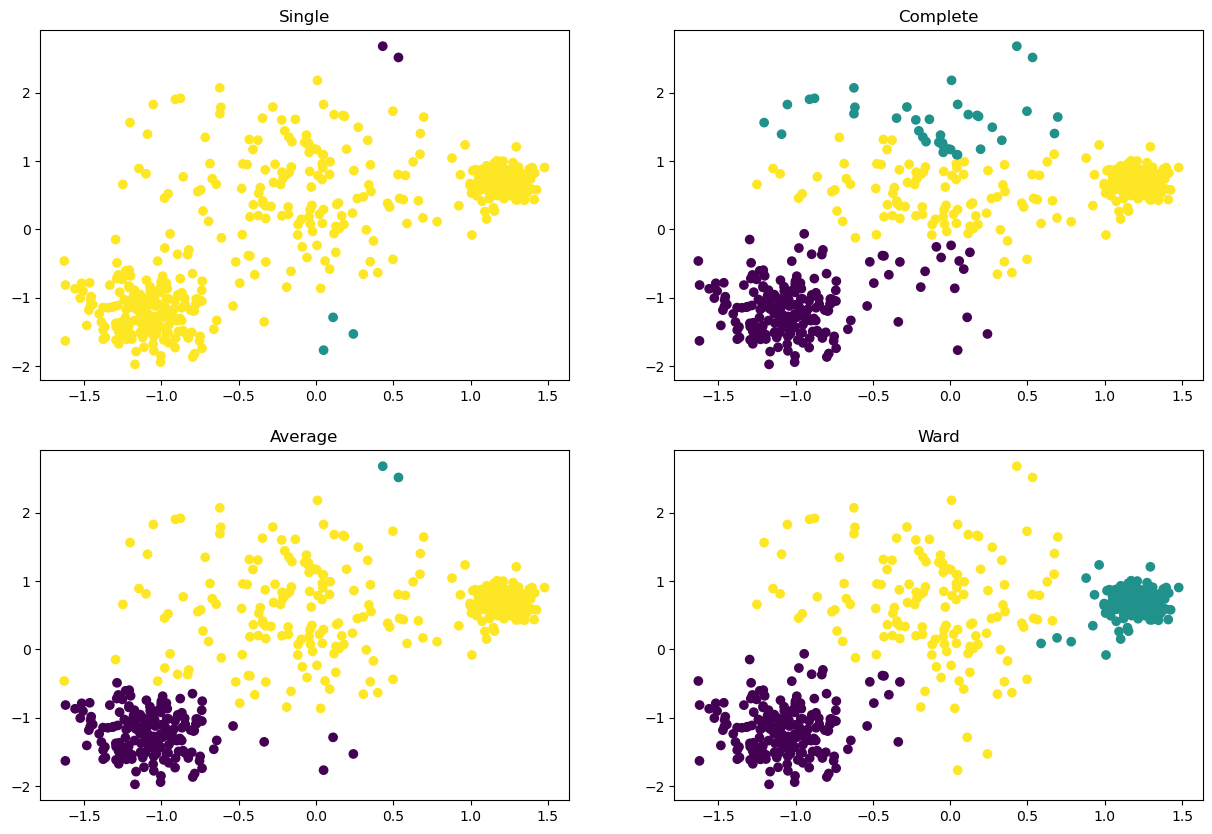

In [163]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X4scaled[:,0], X4scaled[:,1], c= clust2)
plt.title('Single')
plt.subplot(222) 
plt.scatter(X4scaled[:,0], X4scaled[:,1], c= clust1)
plt.title('Complete')
plt.subplot(223)
plt.scatter(X4scaled[:,0], X4scaled[:,1], c= clust3)
plt.title('Average')
plt.subplot(224)
plt.scatter(X4scaled[:,0], X4scaled[:,1], c= clust4)
plt.title('Ward')
plt.show()

https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html

### Ćwiczenie 2: Irysy

Dla danych Irysy wykonaj klasteryzację hierarchiczną dla metod Single, Complete, Average i Ward. 
Wybierz liczbę klastrów, narysuj wyniki grupowań i porównaj wyniki. Pamiętaj o skalowaniu danych!

In [164]:
iris = load_iris()

In [165]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [166]:
X_scaled = StandardScaler().fit_transform(iris.data) 

In [167]:
L2 = linkage(X_scaled, method='single', metric='euclidean')
L1 = linkage(X_scaled, method='complete', metric='euclidean')
L3 = linkage(X_scaled, method='average', metric='euclidean')
L4 = linkage(X_scaled, method='ward', metric='euclidean')

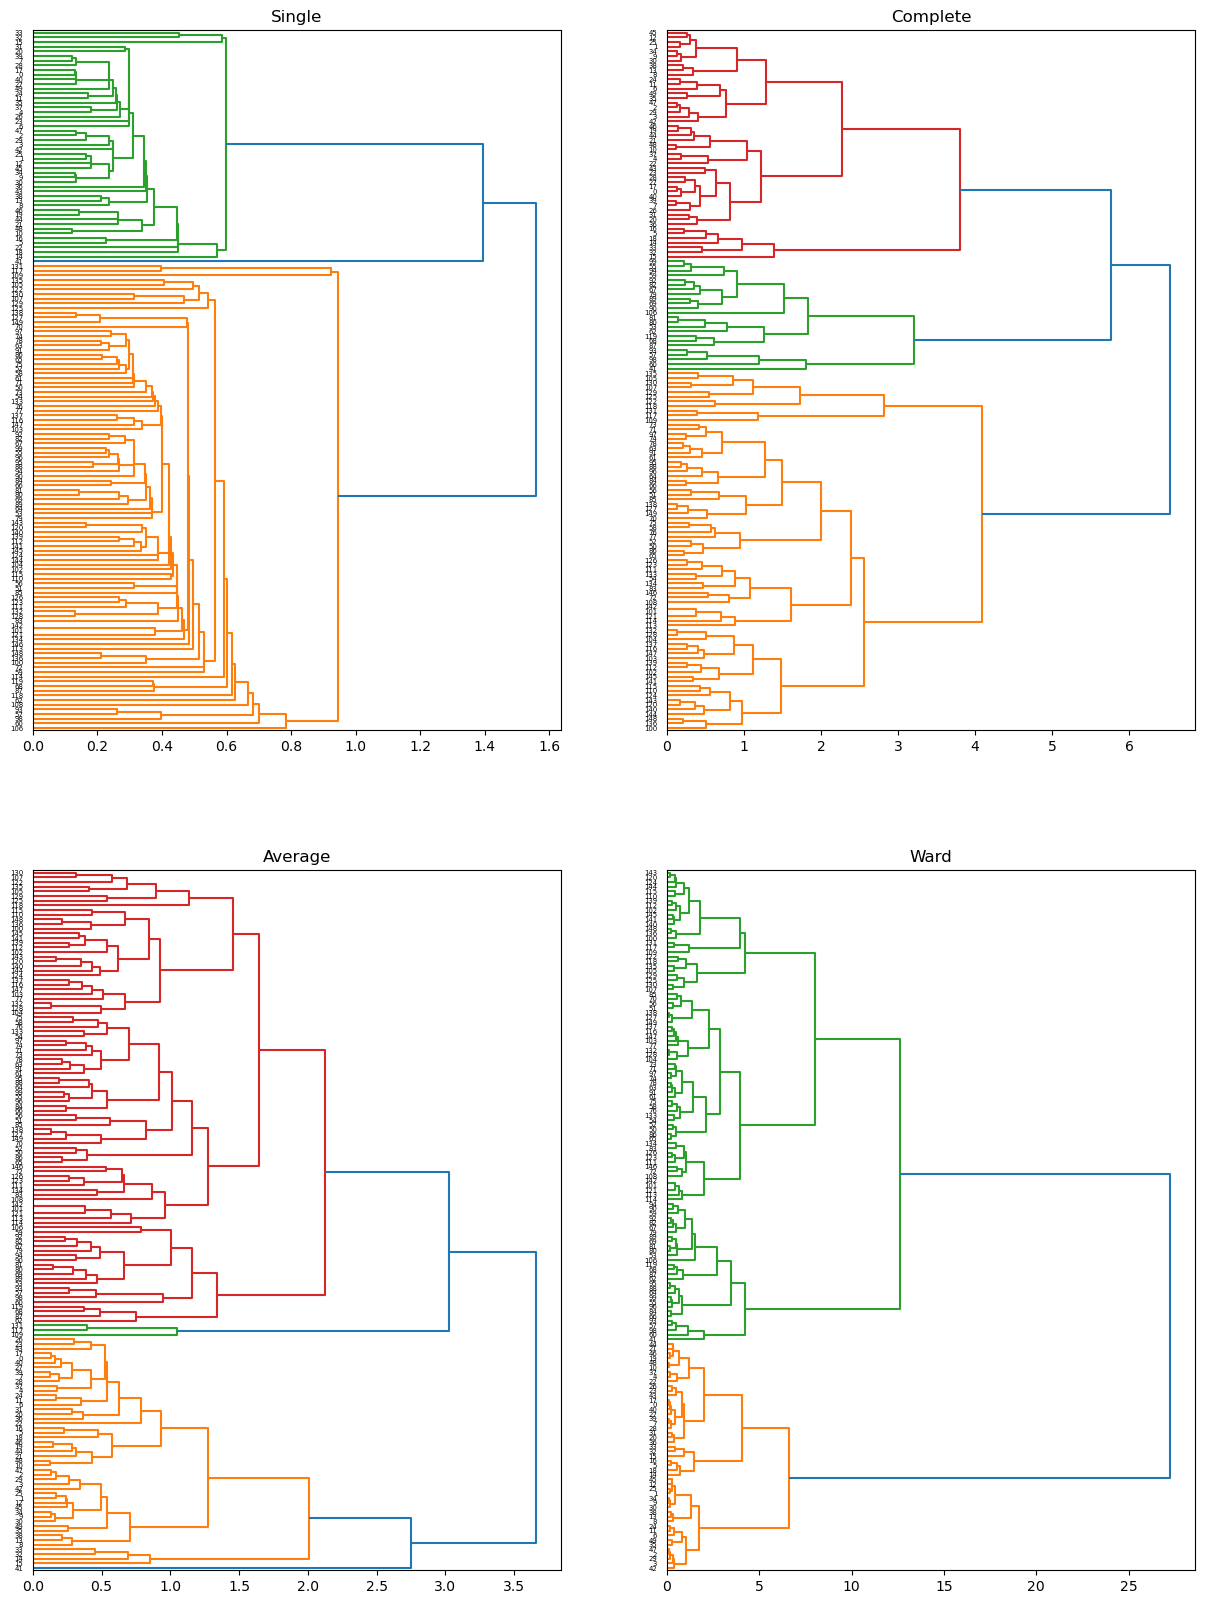

In [168]:
plt.figure(figsize=(15, 20))
plt.subplot(2,2,1)
dendrogram(L2, orientation = 'right')
plt.title('Single')
plt.subplot(2,2,2)
dendrogram(L1, orientation = 'right')
plt.title('Complete')
plt.subplot(2,2,3)
dendrogram(L3, orientation = 'right')
plt.title('Average')
plt.subplot(2,2,4)
dendrogram(L4, orientation = 'right'), 
plt.title('Ward')
plt.show()

Zmniejszenie dendrogramów na wykresach

https://www.python-graph-gallery.com/401-customised-dendrogram

In [169]:
clust1 = fcluster(L1, 3, criterion='maxclust')
clust2 = fcluster(L2, 3, criterion='maxclust')
clust3 = fcluster(L3, 4, criterion='maxclust')
clust4 = fcluster(L4, 2, criterion='maxclust')

In [170]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [392]:
#pd.plotting.scatter_matrix(iris_df, c = model.labels_, figsize = (9, 9), marker = "o", hist_kwds = {"bins": 20}, s= 20, alpha = 0.8)
#plt.show()

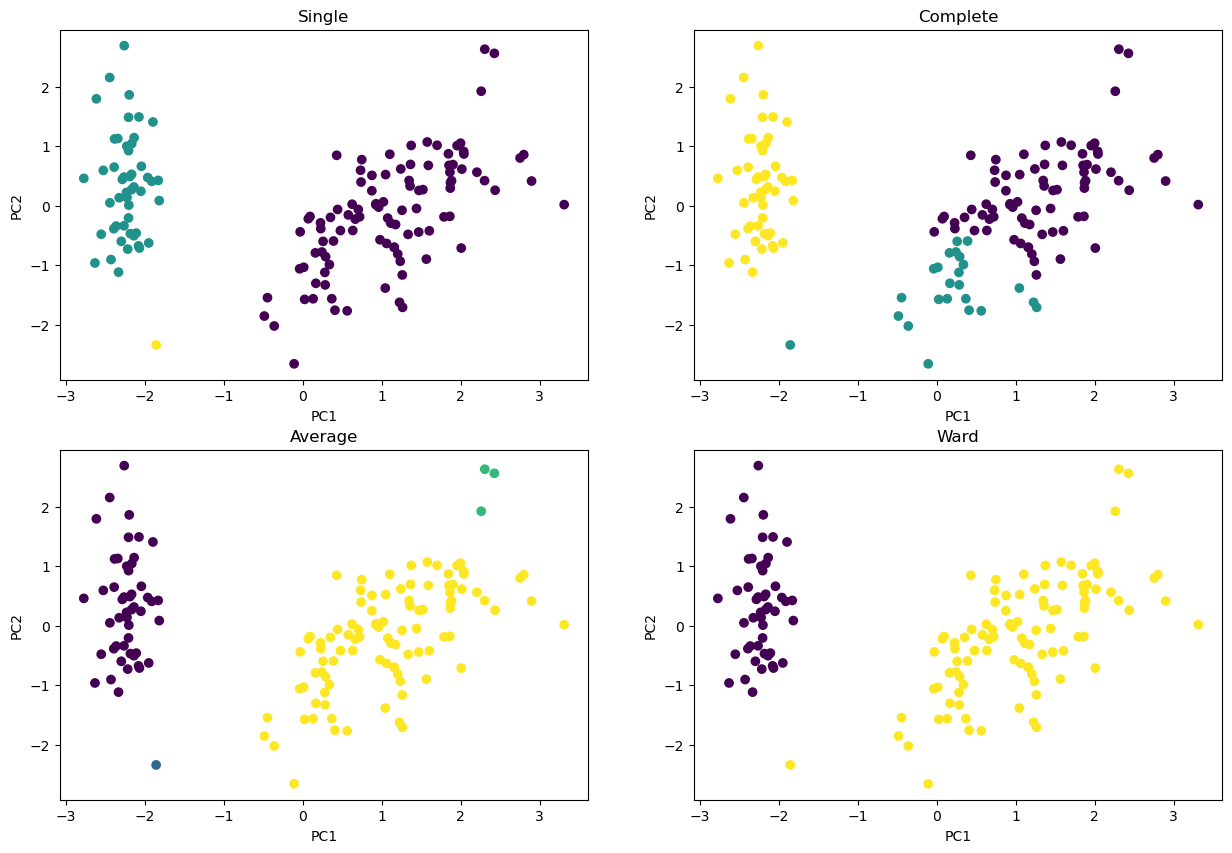

In [171]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X_pca[:,0], X_pca[:,1], c= clust2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Single')
plt.subplot(222) 
plt.scatter(X_pca[:,0], X_pca[:,1], c= clust1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Complete')
plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,1], c= clust3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Average')
plt.subplot(224)
plt.scatter(X_pca[:,0], X_pca[:,1], c= clust4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ward')
plt.show()

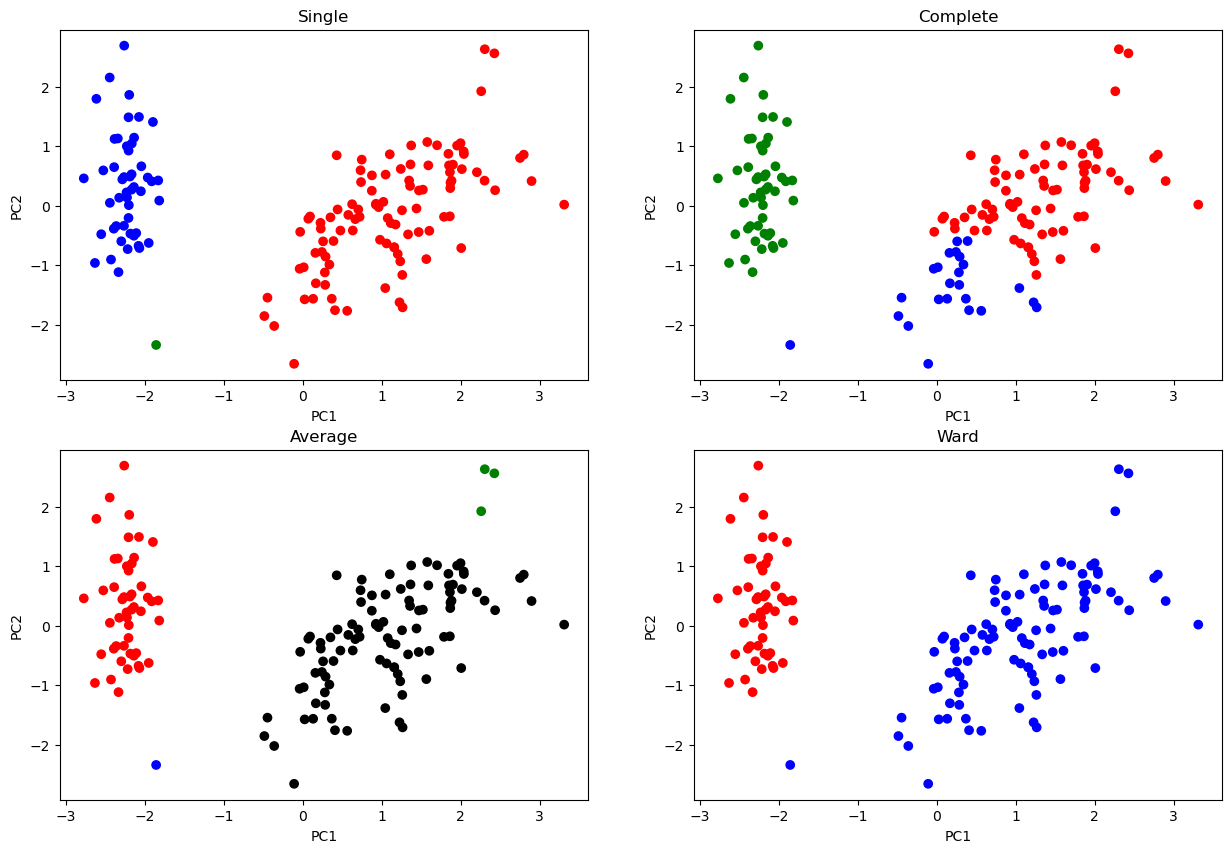

In [172]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X_pca[:,0], X_pca[:,1], c= np.array(["red", "blue", "green"])[np.array(clust2)-1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Single')
plt.subplot(222) 
plt.scatter(X_pca[:,0], X_pca[:,1], c= np.array(["red", "blue", "green"])[np.array(clust1)-1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Complete')
plt.subplot(223)
plt.scatter(X_pca[:,0], X_pca[:,1], c = np.array(["red", "blue", "green", "black"])[np.array(clust3)-1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Average')
plt.subplot(224)
plt.scatter(X_pca[:,0], X_pca[:,1], c= np.array(["red", "blue"])[np.array(clust4)-1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ward')
plt.show()

### Przykład 2: Grupowanie z ograniczeniami

In [183]:
X = make_swiss_roll(1500, noise = .05, random_state = 7)[0]
# odchudzanie rolki
X[:, 1] *= 0.5

In [184]:
X.shape

(1500, 3)

In [185]:
model1 = AgglomerativeClustering(n_clusters = 6, linkage = "ward").fit(X)
label1 = model1.labels_

In [186]:
np.unique(label1)

array([0, 1, 2, 3, 4, 5])

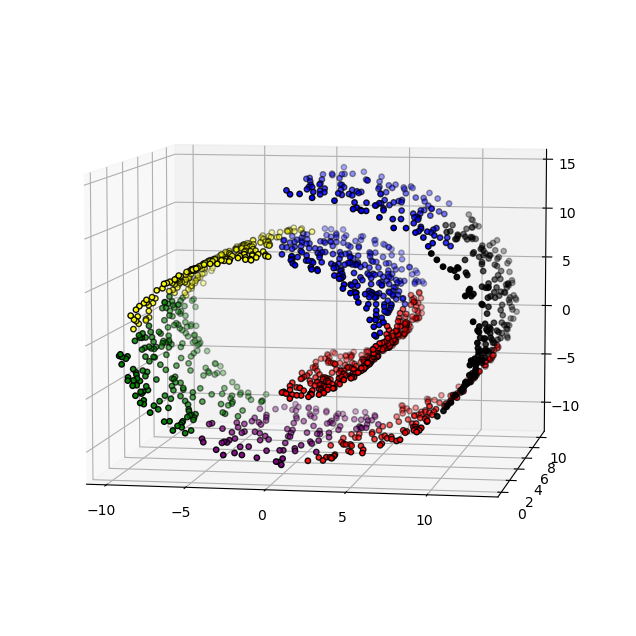

In [187]:
fig1 = plt.figure(figsize = (8, 8))
ax1 = plt.axes(projection ="3d", elev = 7, azim = -80)
# wykre osie tworzy axes i ustawia, że bierzący
# https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html
for l in np.unique(label1):
    ax1.scatter(
        X[label1 == l, 0],
        X[label1 == l, 1],
        X[label1 == l, 2],
        color = np.array(["red", "blue", "green", "black", "yellow", "purple"])[l],
        s = 15,
        edgecolor = "black",
    ) 
#plt.title("Model bez ograniczen")
plt.show()

In [188]:
connectivity = kneighbors_graph(X, n_neighbors = 10, include_self = False)

In [193]:
# zera i jedynki

In [194]:
type(connectivity)

scipy.sparse._csr.csr_matrix

In [193]:
connectivity.shape

(1500, 1500)

In [194]:
connectivity.count_nonzero()

15000

In [195]:
model2 = AgglomerativeClustering(n_clusters = 6, connectivity = connectivity, linkage = "ward").fit(X)

In [196]:
label2 = model2.labels_

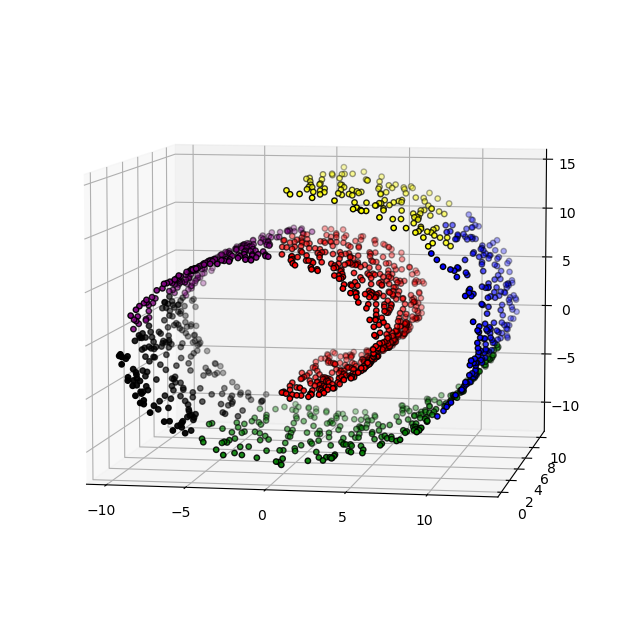

In [197]:
fig2 = plt.figure(figsize = (8, 8))
ax2 = plt.axes(projection ="3d", elev = 7, azim = -80)
for l in np.unique(label2):
    ax2.scatter(
        X[label2 == l, 0],
        X[label2 == l, 1],
        X[label2== l, 2],
        color = np.array(["red", "blue", "green", "black", "yellow", "purple"])[l],
        s = 15,
        edgecolor = "black",
    ) 
plt.show()

## DBSCAN

In [6]:
X = make_blobs(random_state = 0, n_samples = 12)[0]

In [8]:
model1 = DBSCAN().fit(X)
labels1 = model1.labels_
labels1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Oznaczenie szumu to -1!! Wszystkie obserwacje to szum, domyślne parametry nie działają dobrze dla małych zestawów danych.

### Przykład 1: zależność algorytmu od parametrów min_samples i eps

Dla min_samples = [2, 3, 5] oraz eps = [1, 1.5, 2, 3] wykonaj klasteryzację DBSCAN, narysuj wyniki na wykresach i przeanalizuj wpływ parametrów na działanie algorytmu.

In [79]:
min_samples = [2, 3, 5]
eps = [1, 1.5, 2, 3]
prod = list(product(min_samples, eps))
print(prod)
len(prod)
prod[0]

[(2, 1), (2, 1.5), (2, 2), (2, 3), (3, 1), (3, 1.5), (3, 2), (3, 3), (5, 1), (5, 1.5), (5, 2), (5, 3)]


(2, 1)

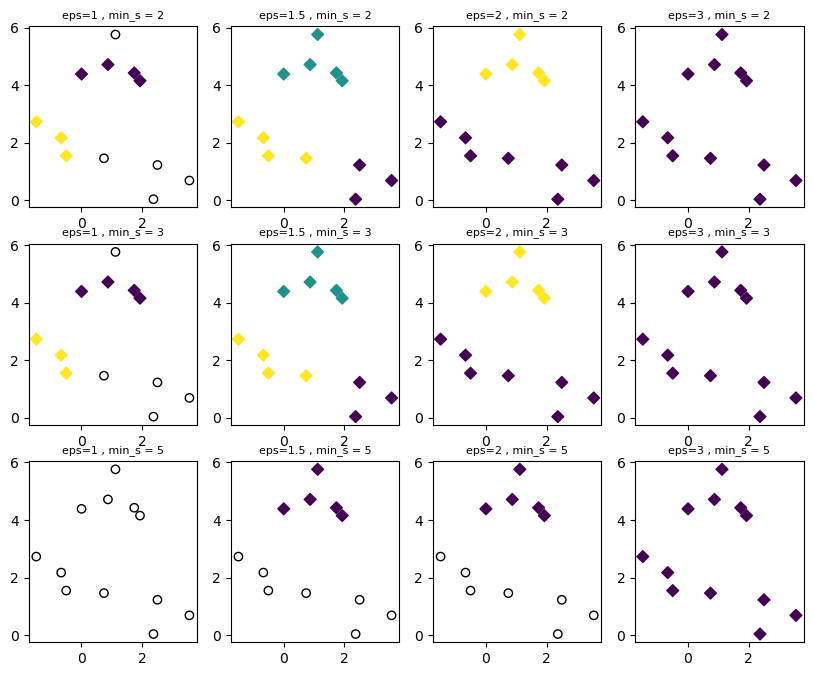

In [96]:
#ax.ravel() to flatten the original list of lists. This allows us to iterate the axes as if they are a simple list.
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize=(10, 8))
ax = axes.ravel()
for i in range(len(prod)):
        model = DBSCAN(eps = prod[i][1], min_samples = prod[i][0]).fit(X)
        labels = model.labels_
        if sum(labels == -1) > 0:
            ax[i].scatter(X[labels == -1, 0], X[labels == -1, 1], facecolors='none', edgecolors='black', marker = "o")
        if sum(labels > -1) > 0:
            ax[i].scatter(X[labels > -1, 0], X[labels > -1, 1], c = labels[labels > -1] , marker = "D")
        ax[i].set_title("eps="+str(prod[i][1])+" , min_s = "+str(prod[i][0]), fontsize = 8)
plt.show()

Szum na obrazkach zaznaczony jest na biało. 

Zwiększenie eps (od lewej do prawej) sprawia, że wielkość klatrów rośnie, 
ale może doprowadzić do połączenia wielu klastrów w jeden. 

Zwiększenie min_s (od góry do dołu) oznacza, że mniej punktów będzie punktami głównymi, a więcej będzie oznaczone jako szum.

Parametr eps określa, że punkty są blisko. Bardzo małe eps oznacza, że żadne punkty nie są punktami głównymi, mamy tylko szum. 
Bardzo duża wartość spowoduje, że wszystkie punkty będą w jednej grupie. Eps kontroluje liczbę znalezionych klastrów.

Min_s określa, czy punkty w mniej gęstych regionach będę oznaczane jako wartości odstające, czy osobne klastry. 
Jeśli zmniejszyć min_s, wszystko, co byłoby klastrem z mniejszą ilością punktów niż min_s, zostanie oznaczone jako szum. 
Określa zatem minimalny rozmiar klastra. Widoać to dla eps 1.5, min_s z 3 do 5.

### Ćwiczenie 1

Dla poniższych zbiorów danych noisy moons i varied normal wykonaj klastrowanie DBSCAN i zwizualizuj wyniki. Użyj różnych parametrów min_samples i eps i porównaj wyniki.

In [198]:
noisy_moons = make_moons(n_samples = 500, noise=0.05)
varied_normal = make_blobs(n_samples = 500, cluster_std=[1.0, 2.5, 0.5], random_state = 170)
X1 = noisy_moons[0]
X2 = varied_normal[0]
scaler1 = StandardScaler() 
X1_scaled = scaler1.fit_transform(X1)
scaler2 = StandardScaler() 
X2_scaled = scaler2.fit_transform(X2)

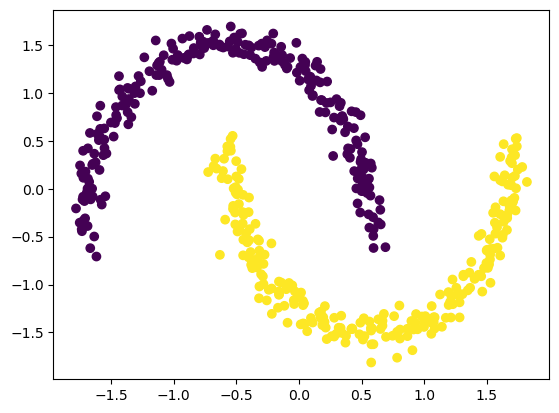

In [199]:
model1 = DBSCAN().fit(X1_scaled)
labels1 = model1.labels_
if sum(labels1 == -1) > 0:
    plt.scatter(X1_scaled[labels1 == -1, 0], X1_scaled[labels1 == -1, 1], facecolors='none', edgecolors='black', marker = "o")
if sum(labels1 > -1) > 0:
    plt.scatter(X1_scaled[labels1 > -1, 0], X1_scaled[labels1 > -1, 1], c = labels1[labels1 > -1])

In [200]:
np.unique(labels1)

array([0, 1])

In [201]:
sum(labels1 == -1)

0

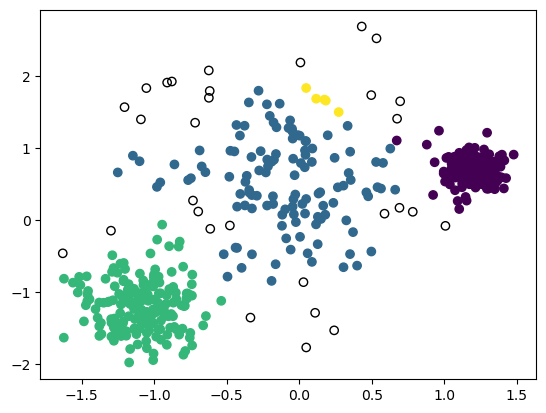

In [202]:
model2 = DBSCAN(eps = .25, min_samples = 4).fit(X2_scaled)
labels2 = model2.labels_
if sum(labels2 == -1) > 0:
    plt.scatter(X2_scaled[labels2 == -1, 0], X2_scaled[labels2 == -1, 1], facecolors='none', edgecolors='black', marker = "o")
if sum(labels2 > -1) > 0:
    plt.scatter(X2_scaled[labels2 > -1, 0], X2_scaled[labels2 > -1, 1], c = labels2[labels2 > -1])

### Metoda wyboru eps

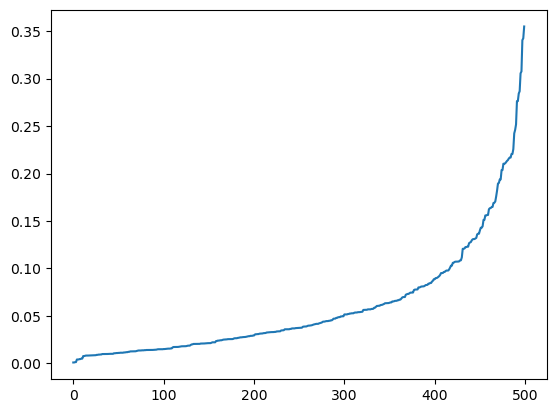

In [203]:
model_knn = NearestNeighbors(n_neighbors = 4).fit(X2_scaled)
distances = model_knn.kneighbors(X2_scaled)[0]
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [204]:
kl = KneeLocator(range(0, len(distances)), distances, curve="convex", direction="increasing") # , interp_method="polynomial"
kl.elbow

478

In [205]:
distances[478]

0.21073187383435396

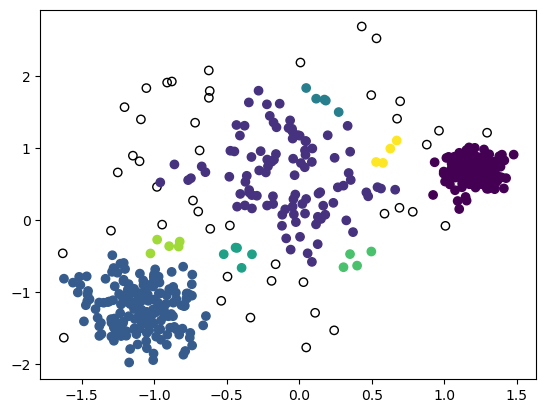

In [206]:
model2 = DBSCAN(eps = .21, min_samples = 4).fit(X2_scaled)
labels2 = model2.labels_
if sum(labels2 == -1) > 0:
    plt.scatter(X2_scaled[labels2 == -1, 0], X2_scaled[labels2 == -1, 1], facecolors='none', edgecolors='black', marker = "o")
if sum(labels2 > -1) > 0:
    plt.scatter(X2_scaled[labels2 > -1, 0], X2_scaled[labels2 > -1, 1], c = labels2[labels2 > -1])

### Ćwiczenie 2: Irysy

Dla danych Irysy wykonaj grupowanie DBSCAN i dobierz parametry modelu. Przedstaw wyniki na wykresie.

https://scikit-learn.org/stable/modules/clustering.html

In [2]:
iris = load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
X_scaled = StandardScaler().fit_transform(iris.data) 

In [5]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
model1 = DBSCAN().fit(X_scaled)
labels1 = model1.labels_

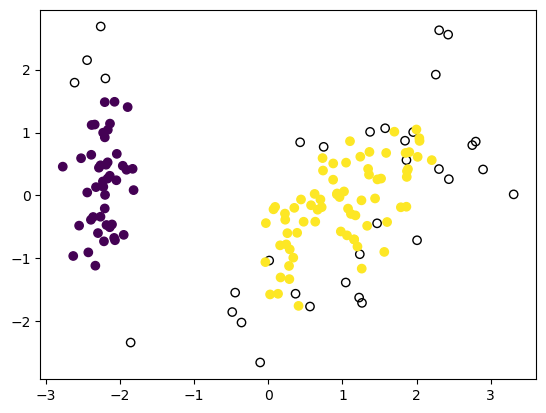

In [7]:
if sum(labels1 == -1) > 0:
    plt.scatter(X_pca[labels1 == -1, 0], X_pca[labels1 == -1, 1], facecolors='none', edgecolors='black', marker = "o")
if sum(labels1 > -1) > 0:
    plt.scatter(X_pca[labels1 > -1, 0], X_pca[labels1 > -1, 1], c = labels1[labels1 > -1])

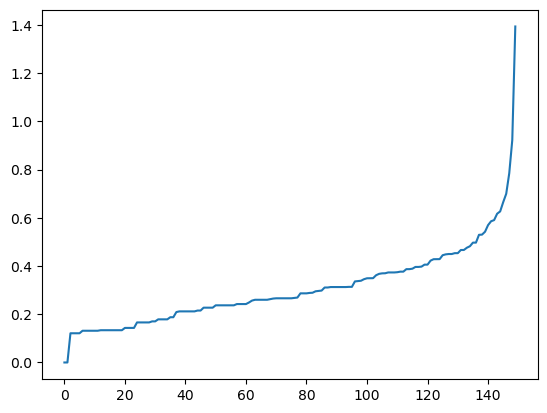

In [8]:
model_knn = NearestNeighbors(n_neighbors = 8).fit(X_scaled)
distances = model_knn.kneighbors(X_scaled)[0]
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [9]:
kl = KneeLocator(range(0, len(distances)), distances, curve="convex", direction="increasing") # , interp_method="polynomial"
kl.elbow

130

In [10]:
distances[130]

0.453522823776024

In [11]:
model1 = DBSCAN(eps = .45, min_samples = 8).fit(X_scaled)
labels1 = model1.labels_

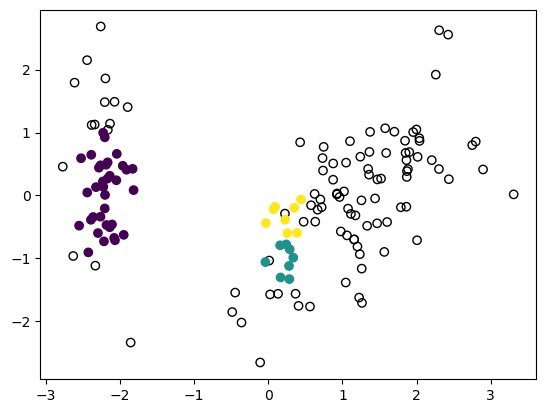

In [12]:
if sum(labels1 == -1) > 0:
    plt.scatter(X_pca[labels1 == -1, 0], X_pca[labels1 == -1, 1], facecolors='none', edgecolors='black', marker = "o")
if sum(labels1 > -1) > 0:
    plt.scatter(X_pca[labels1 > -1, 0], X_pca[labels1 > -1, 1], c = labels1[labels1 > -1])

In [13]:
model1 = DBSCAN(eps = .9, min_samples = 5).fit(X_scaled)
labels1 = model1.labels_

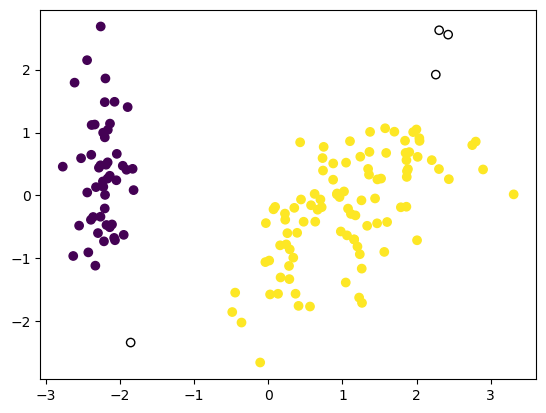

In [14]:
if sum(labels1 == -1) > 0:
    plt.scatter(X_pca[labels1 == -1, 0], X_pca[labels1 == -1, 1], facecolors='none', edgecolors='black', marker = "o")
if sum(labels1 > -1) > 0:
    plt.scatter(X_pca[labels1 > -1, 0], X_pca[labels1 > -1, 1], c = labels1[labels1 > -1])



## Źródła:

http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

https://www.learndatasci.com/glossary/hierarchical-clustering/

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://pbiecek.github.io/NaPrzelajDataMiningR/part-3.html#part_31

Hastie, Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. Vol. 2. New York: springer, 2009.

Muller, Andreas, et al. Machine learning, Python i data science, Wprowadzenie. Helion, 2021.

